In [1]:
##import library
from __future__ import print_function
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model,metrics
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
import pylab as pl
from pylab import *
sns.set_style("whitegrid")
sns.set_context("poster")
import random
import math
from scipy.signal import butter, lfilter, freqz
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')
def searchByTime(arr,target):
    left = 0
    right = len(arr) -1
    while(left<right-1):
        mid = int(left + (right-left)/2)
        if arr[mid] > target:
            right = mid
        else:
            left = mid
    if (arr[right] - target) > (target - arr[left]):
        return left
    else:
        return right

def EulerToQua(yaw,pit,rol,arr_e0,arr_e1,arr_e2,arr_e3):
    e0 = 0
    e1 = 0
    e2 = 0
    e3 = 0
    for i in range(len(rol)) :
        e0 = math.cos(yaw[i]/114.6)*math.cos(pit[i]/114.6)*math.cos(rol[i]/114.6) + math.sin(yaw[i]/114.6)*math.sin(pit[i]/114.6)*math.sin(rol[i]/114.6)
        e1 = math.cos(yaw[i]/114.6)*math.cos(pit[i]/114.6)*math.sin(rol[i]/114.6) - math.sin(yaw[i]/114.6)*math.sin(pit[i]/114.6)*math.cos(rol[i]/114.6)
        e2 = math.cos(yaw[i]/114.6)*math.sin(pit[i]/114.6)*math.cos(rol[i]/114.6) + math.sin(yaw[i]/114.6)*math.cos(pit[i]/114.6)*math.sin(rol[i]/114.6)
        e3 = math.sin(yaw[i]/114.6)*math.cos(pit[i]/114.6)*math.cos(rol[i]/114.6) - math.cos(yaw[i]/114.6)*math.sin(pit[i]/114.6)*math.sin(rol[i]/114.6)
        arr_e0.append(e0)
        arr_e1.append(e1)
        arr_e2.append(e2)
        arr_e3.append(e3)

def transQuaToZXZ(arr_w,arr_x,arr_y,arr_z,angle_y,angle_b,angle_a,angle_rotate,angle_yaw,angle_pit,angle_rol):
    for i in range(len(arr_w)):
        e0=arr_w[i]
        e1=arr_x[i]
        e2=arr_y[i]
        e3=arr_z[i]
        if (1-2*(e2*e2+e3*e3))>1 or (1-2*(e2*e2+e3*e3))<-1:
            print (i)
            print (1-2*(e2*e2+e3*e3))
    for i in range(len(arr_w)):
        e0=arr_w[i]
        e1=arr_x[i]
        e2=arr_y[i]
        e3=arr_z[i]
#        if e2*e2+e3*e3 = 0 :
#            ab = 0
        #xzx  α=a β=b γ=y   
        aa = math.atan2((e1*e3-e2*e0),(e1*e2+e0*e3))*57.3
        if (1-2*(e2*e2+e3*e3))>1:
            ab = math.acos(1)*57.3
        elif (1-2*(e2*e2+e3*e3))<-1:
            ab = math.acos(-1)*57.3
        else:
            ab = math.acos(1-2*(e2*e2+e3*e3))*57.3
            
        ay = math.atan2((e1*e3+e2*e0),(-e1*e2+e0*e3))*57.3
        
        #zyx Tait–Bryan φ=roll θ=pit(-pi/2~pi/2) ψ=yaw 
        yaw = math.atan2(2 * e1 * e2 + 2 * e0 * e3, -2 * e2*e2 - 2 * e3* e3 + 1)* 57.3;
        pit = math.asin(-2 * e1 * e3 + 2 * e0 * e2)* 57.3; 
        rol = math.atan2(2 * e2 * e3 + 2 * e0 * e1, -2 * e1 * e1 - 2 * e2* e2 + 1)* 57.3; 
        angle_yaw.append(yaw)
        angle_pit.append(pit)
        angle_rol.append(rol)
        angle_y.append(ay)
        angle_b.append(ab)
        angle_a.append(aa)
        if 0<=(ay+aa-180)<=360:
            angle_rotate.append(ay+aa-180)
        elif -360<=(ay+aa-180)<0:
            angle_rotate.append(ay+aa-180+360)
        elif (ay+aa-180)>360:
            angle_rotate.append(ay+aa-180-360)
        else:
            angle_rotate.append(ay+aa-180+720)

def VerticalAngles(yaw,pit,rol,time):
    vertical = []
    
    for i in range(len(time)):
        if rol[i]<0:
            vertical.append(-rol[i])
        else:
            vertical.append(rol[i])
    return vertical

def HorizontalAngles(yaw,pit,rol,time):
    horizontal = []
    for i in range(len(time)):
        tmp = yaw[i] - pit[i]
        horizontal.append(tmp)
    return horizontal 

def adjustcurve(angles_arr,begin,end,time_arr,mode,number):
    if begin>= end or searchByTime(time_arr, begin)<0 or searchByTime(time_arr,end)>len(angles_arr):
        return 0
    new_angles_arr = []
    if mode == 1:
        for i in range(searchByTime(time_arr,begin)):
            new_angles_arr.append(angles_arr[i])
        for i in range(searchByTime(time_arr,begin),searchByTime(time_arr,end)):
            new_angles_arr.append(angles_arr[i]+number)
        for i in range(searchByTime(time_arr,end),len(angles_arr)):
            new_angles_arr.append(angles_arr[i])
    if mode == 2:
        for i in range(searchByTime(time_arr,begin)):
            new_angles_arr.append(angles_arr[i])
        for i in range(searchByTime(time_arr,begin),searchByTime(time_arr,end)):
            new_angles_arr.append(angles_arr[i]+(number/(end-begin))*(time_arr[i]-begin))
        for i in range(searchByTime(time_arr,end),len(angles_arr)):
            new_angles_arr.append(angles_arr[i])
    if mode == 3:
        for i in range(searchByTime(time_arr,begin)):
            new_angles_arr.append(angles_arr[i])
        for i in range(searchByTime(time_arr,begin),searchByTime(time_arr,end)):
            new_angles_arr.append(number)
        for i in range(searchByTime(time_arr,end),len(angles_arr)):
            new_angles_arr.append(angles_arr[i])
    if mode ==4:
        tmp = []
        for i in range(searchByTime(time_arr,begin),searchByTime(time_arr,end)):
            tmp.append(angles_arr[i])
        Mean = mean(tmp)
        print(Mean)
        for i in range(searchByTime(time_arr,begin)):
            new_angles_arr.append(angles_arr[i])
        for i in range(searchByTime(time_arr,begin),searchByTime(time_arr,end)):
            new_angles_arr.append((angles_arr[i]-Mean)*number+Mean)
        for i in range(searchByTime(time_arr,end),len(angles_arr)):
            new_angles_arr.append(angles_arr[i])
    time_min = []
    for i in range(len(time_arr)):
        
        min = time_arr[i]/60000
        time_min.append(min)
    plt.figure(figsize=(10, 6))
    plt.plot(time_min,new_angles_arr, color = 'red')
    plt.plot(time_min,angles_arr, color = 'black')
    plt.xlabel('Time(minute)')
    plt.ylabel('Degree(°)')
    plt.title('Adjusted&Original')
    plt.show()
    return new_angles_arr

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
            
def IsExist(array, target):
    lo = 0
    hi = len(array)-1
    while lo<=hi :
        mid = int(lo +(hi-lo)/2)
        if array[mid]<target :
            lo = mid +1
        elif array[mid]> target:
            hi = mid -1
        else :
            return True
    return False

def DrawMapByColors(stage,x_draw,y_draw,run_num):
    stage.insert(0,0)
    plt.figure(figsize=(30,18))
    plt.axis('equal')
    color_color = []
    for i in range(len(stage)):
        color_x = []
        color_y = []
        if i%2 == 0:
            color_color.append('red')
        else:
            color_color.append('black')
        for j in range(stage[i],len(x_draw)):
            color_x.append(x_draw[j])
            color_y.append(y_draw[j])
        plt.plot(color_x,color_y, color =color_color[i] )
    plt.xlabel('X(feet)')
    plt.ylabel('Y(feet)')
    plt.suptitle('SA Round '+ run_num)
    plt.title('Horizontal Heading Direction')
    plt.show()
    stage.pop(0)

def DrawPlotByColors(stage,time,angles):
    plt.figure(figsize=(15,9))
    color_color = []
    for i in range(len(stage)):
        color_angles = []
        color_time = []
        color_time_min = []
        if i%2 == 0:
            color_color.append('red')
        else:
            color_color.append('black')
        for j in range(stage[i],len(angles)):
            color_angles.append(angles[j])
            color_time.append(time[j])
        for k in range(len(color_time)):
            min = color_time[k]/60000
            color_time_min.append(min)
        plt.plot(color_time_min,color_angles,color =color_color[i] )
    plt.xlabel('Time(minute)')
    plt.ylabel('Degree(°)')
    plt.suptitle('SA Round '+ run_num)
    plt.title('Horizontal Heading Direction')
    plt.show()

def initData(Speed,Angles,x,y,t,begin_x, begin_y,k):
    for i in range(len(t)):
        if i == 0:
            x.append(begin_x*k)
            y.append(begin_y*k)
        else:
            x_point = x[i-1]-Speed[i-1]*(t[i]-t[i-1])*math.sin(Angles[i-1]/57.3)
            y_point = y[i-1]-Speed[i-1]*(t[i]-t[i-1])*math.cos(Angles[i-1]/57.3)
            x.append(x_point)
            y.append(y_point)
    

    plt.figure(figsize=(30, 18))
    plt.axis('equal') 
    plt.plot(x,y, color = 'black')
    plt.suptitle('SA Round4 ')
    plt.title('Pipe Map')
    plt.show() 
            

In [2]:
## Get all nessesary data
Trimed_Data01 = pd.read_csv("Wise_run04with speedAngle.csv",delimiter=",")
run_Number = '04'
Trimed_Data01.head()



Unnamed: 0  Unnamed: 0.1   time  flapper0   flapper1   flapper2   flapper3  \
0           0             0    0.0  4.966704  22.658270  24.773564  19.293239   
1           1             1   41.0  5.433212  21.924608  25.251200  19.427853   
2           2             2   77.0  5.873456  21.091103  25.666342  19.582340   
3           3             3  116.0  6.191070  20.381235  25.928602  19.717037   
4           4             4  152.0  6.344138  19.940112  26.013026  19.804919   

   flapper4  flapper5  flapper6  ...  rotationalSpeedY  rotationalSpeedZ  \
0       NaN       NaN       NaN  ...               9.0             -10.0   
1       NaN       NaN       NaN  ...               6.0              11.0   
2       NaN       NaN       NaN  ...               1.0               6.0   
3       NaN       NaN       NaN  ...             -12.0              24.0   
4       NaN       NaN       NaN  ...               2.0               6.0   

   orientationX  orientationY  orientationZ  velocity  probability  avg  \
0         127.0         -38.0         100.0  0.271183     0.762203  inf   
1         127.0         -38.0         100.0  0.271183     0.762203  inf   
2         127.0         -38.0         100.0  0.271183     0.762203  inf   
3         127.0         -38.0         100.0  0.271183     0.762203  inf   
4         127.0         -38.0         100.0  0.271183     0.762203  inf   

     angles  angles_rotation  
0 -0.000140     0.000000e+00  
1 -0.001481    -2.756255e-08  
2 -0.007581    -2.922189e-07  
3 -0.025618    -1.513465e-06  
4 -0.066114    -5.182449e-06  

[5 rows x 30 columns]

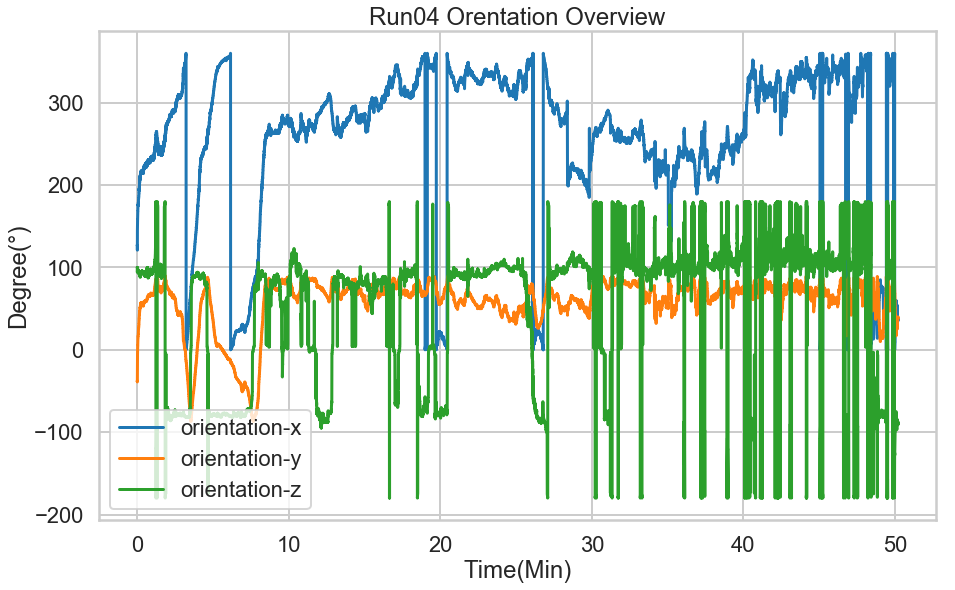

In [3]:
# Trans other type data into angles, or get angles directly from df(automatic).
import matplotlib.pyplot as plt
y1 = Trimed_Data01['orientationX']
y2 = Trimed_Data01['orientationY']
y3 = Trimed_Data01['orientationZ']
time = Trimed_Data01['time']
time_min = []
for i in range(len(time)):
    time_min.append(time[i]/60000)
plt.figure(figsize=(15, 9))

plt.plot(time_min,y1,label='orientation-x')  
plt.plot(time_min,y2,label='orientation-y')  
plt.plot(time_min,y3,label='orientation-z') 
plt.legend(loc='lower left')
plt.xlabel('Time(Min)')
plt.ylabel('Degree(°)')
plt.title('Run' + run_Number +' Orentation Overview')
plt.show()

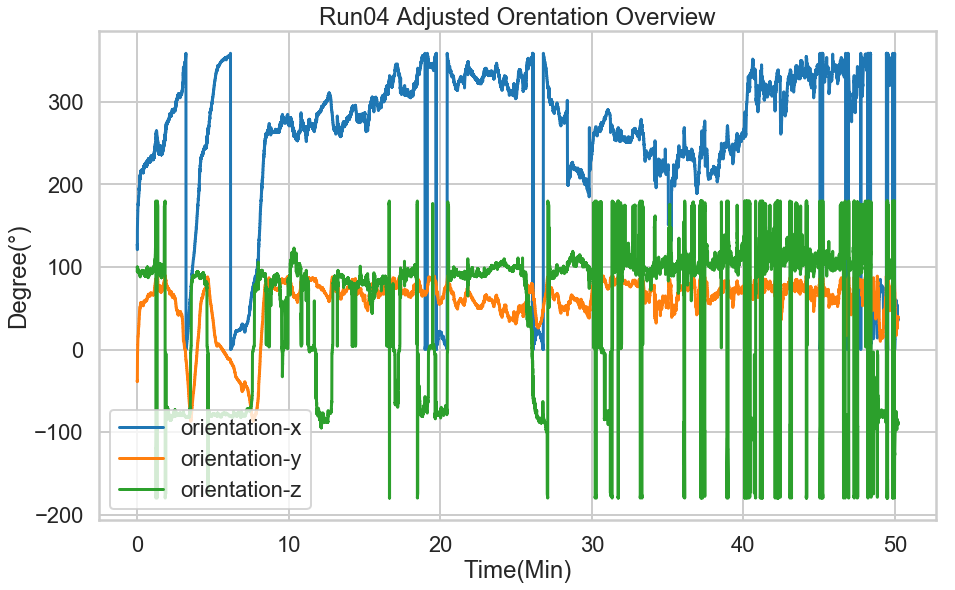

In [4]:
#Adjust all euler angles

Original_X = Trimed_Data01['orientationX']
Original_Y = Trimed_Data01['orientationY']
Original_Z = Trimed_Data01['orientationZ']

Adjusted_X1 = []
Adjusted_X = []
Adjusted_Y = []
Adjusted_Z = []
signal = 0



for i in range(14631):
    Adjusted_X1.append(Original_X[i])
for i in range(14631,len(Original_X)):
    Adjusted_X1.append(Original_X[i])

    
    
for i in range(len(Original_X)):
    if 0<Adjusted_X1[i]<360 :
        Adjusted_X.append(Adjusted_X1[i])
    elif 360<=Adjusted_X1[i]<720:
        Adjusted_X.append(Adjusted_X1[i]-360)
    elif 720<=Adjusted_X1[i]<1080:
        Adjusted_X.append(Adjusted_X1[i]-720)
    else:
        Adjusted_X.append(Adjusted_X1[i])
        
for i in range(len(Original_Y)):
    Adjusted_Y.append(Original_Y[i])
    
for i in range(len(Original_Z)):
    Adjusted_Z.append(Original_Z[i])

    
    
plt.figure(figsize=(15, 9))

plt.plot(time_min,Adjusted_X,label='orientation-x')  
plt.plot(time_min,Adjusted_Y,label='orientation-y')  
plt.plot(time_min,Adjusted_Z,label='orientation-z') 
plt.title('Run' + run_Number +' Adjusted Orentation Overview')
plt.legend(loc='lower left')
plt.xlabel('Time(Min)')
plt.ylabel('Degree(°)')
plt.show()

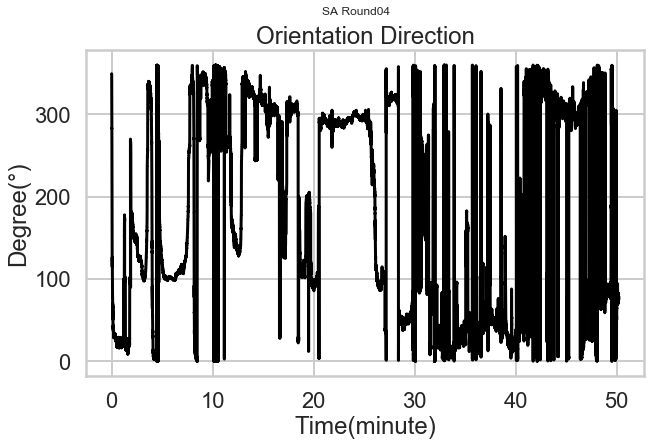

In [5]:
#Trans angles to Orentation, Horizontal, Vertical Direction and get plot(automatic).
arr_e0 = []
arr_e1 = []
arr_e2 = []
arr_e3 = []
y1 = Adjusted_X
y2 = Adjusted_Y
y3 = Adjusted_Z
a1 = []
a2 = []
a3 = []
angle_y = []
angle_b = []
angle_a = []
angle_rotate = []
angle_yaw = []
angle_pit = []
angle_rol = []

#step1 : translate euler to qua
#step2 : translate qua to zxz 
EulerToQua(y1,y2,y3,arr_e0,arr_e1,arr_e2,arr_e3)
transQuaToZXZ(arr_e0,arr_e1,arr_e2,arr_e3,angle_y,angle_b,angle_a,angle_rotate,angle_yaw,angle_pit,angle_rol)


#step3 : draw picture
plt.figure(figsize=(10, 6))
plt.plot(time_min,angle_rotate,color = 'black')  
plt.xlabel('Time(minute)')
plt.ylabel('Degree(°)')
plt.suptitle('SA Round' +run_Number)
plt.title('Orientation Direction')
plt.show()

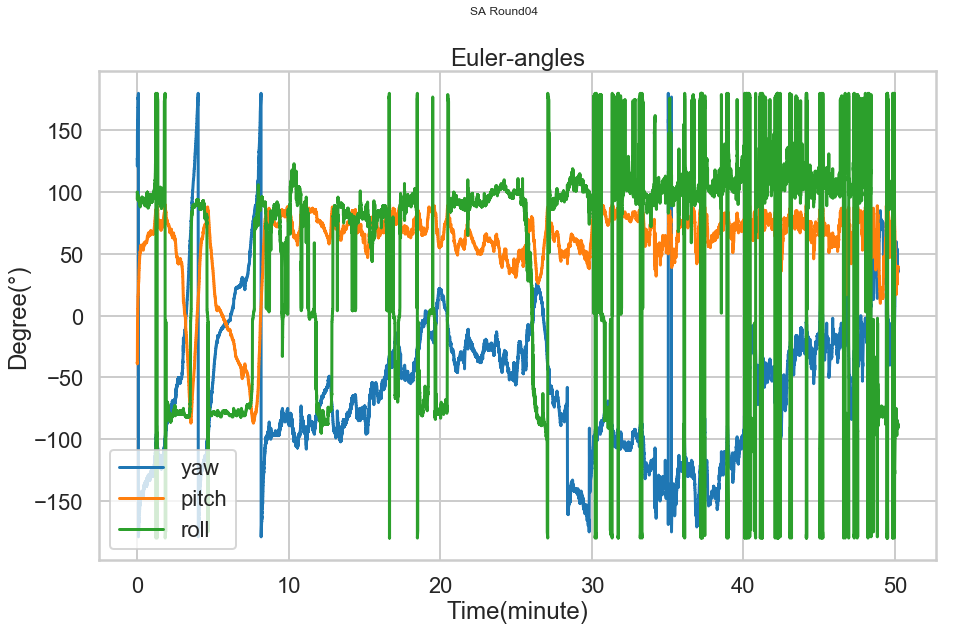

In [6]:
plt.figure(figsize=(15, 9))

plt.plot(time_min,angle_yaw,label='yaw')  
plt.plot(time_min,angle_pit,label='pitch')  
plt.plot(time_min,angle_rol,label='roll') 
plt.legend(loc='lower left')
plt.xlabel('Time(minute)')
plt.ylabel('Degree(°)')
plt.suptitle('SA Round' +run_Number)
plt.title('Euler-angles')
plt.show()

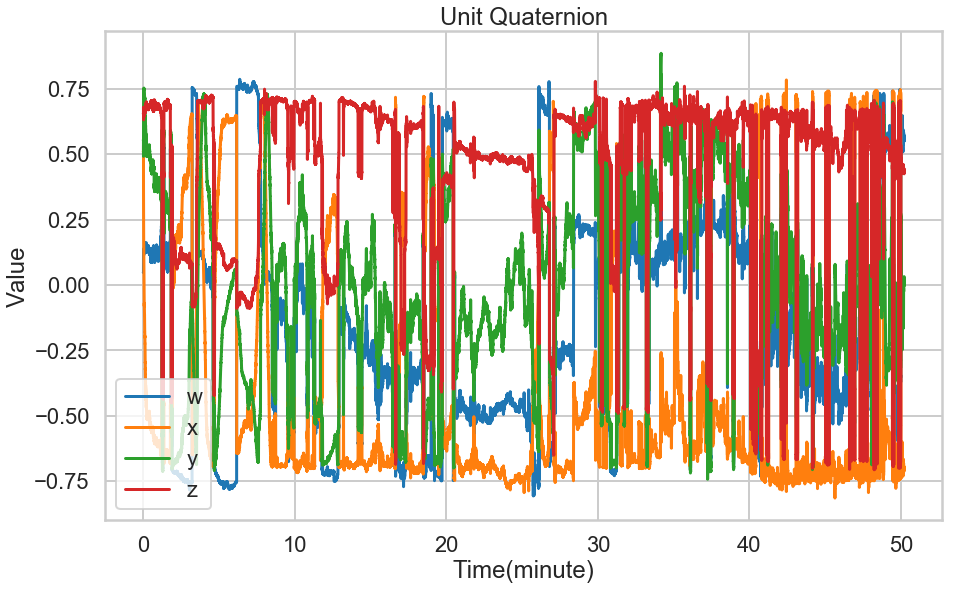

In [7]:
plt.figure(figsize=(15, 9))
plt.plot(time_min,arr_e0,label='w')  
plt.plot(time_min,arr_e1,label='x')  
plt.plot(time_min,arr_e2,label='y') 
plt.plot(time_min,arr_e3,label='z')
plt.legend(loc='lower left')
plt.xlabel('Time(minute)')
plt.ylabel('Value')
plt.title('Unit Quaternion')
plt.show()

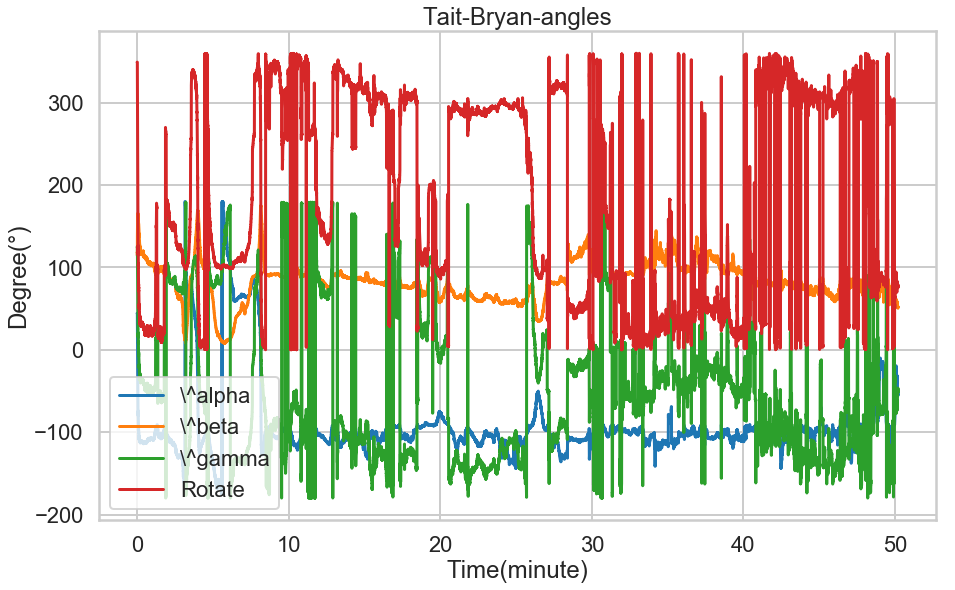

In [8]:
plt.figure(figsize=(15, 9))
plt.plot(time_min,angle_a,label='\^alpha')  
plt.plot(time_min,angle_b,label='\^beta')  
plt.plot(time_min,angle_y,label='\^gamma') 
plt.plot(time_min,angle_rotate,label='Rotate')
plt.legend(loc='lower left')
plt.xlabel('Time(minute)')
plt.ylabel('Degree(°)')
plt.title('Tait-Bryan-angles')
plt.show()

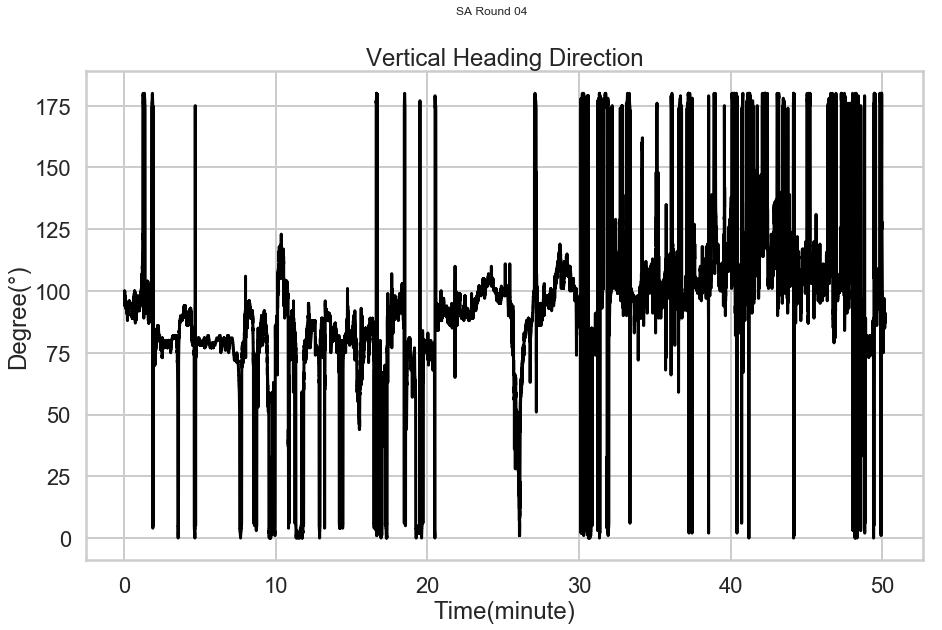

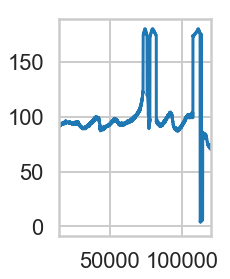

In [9]:
Test_Horizontal = []#Horizontal
Test_Vertical = []#Vertical  
Test_Vertical = VerticalAngles(Adjusted_X,Adjusted_Y,Adjusted_Z,time)
Test_Horizontal = HorizontalAngles(Adjusted_X,Adjusted_Y,Adjusted_Z,time)

plt.figure(figsize=(15, 9))

plt.plot(time_min,Test_Vertical, color ='black')
plt.xlabel('Time(minute)')
plt.ylabel('Degree(°)')
plt.suptitle('SA Round ' + run_Number)
plt.title('Vertical Heading Direction')
plt.show()

plt.subplot(122)
xlim(15000, 120000)
plt.plot(time,Test_Vertical )

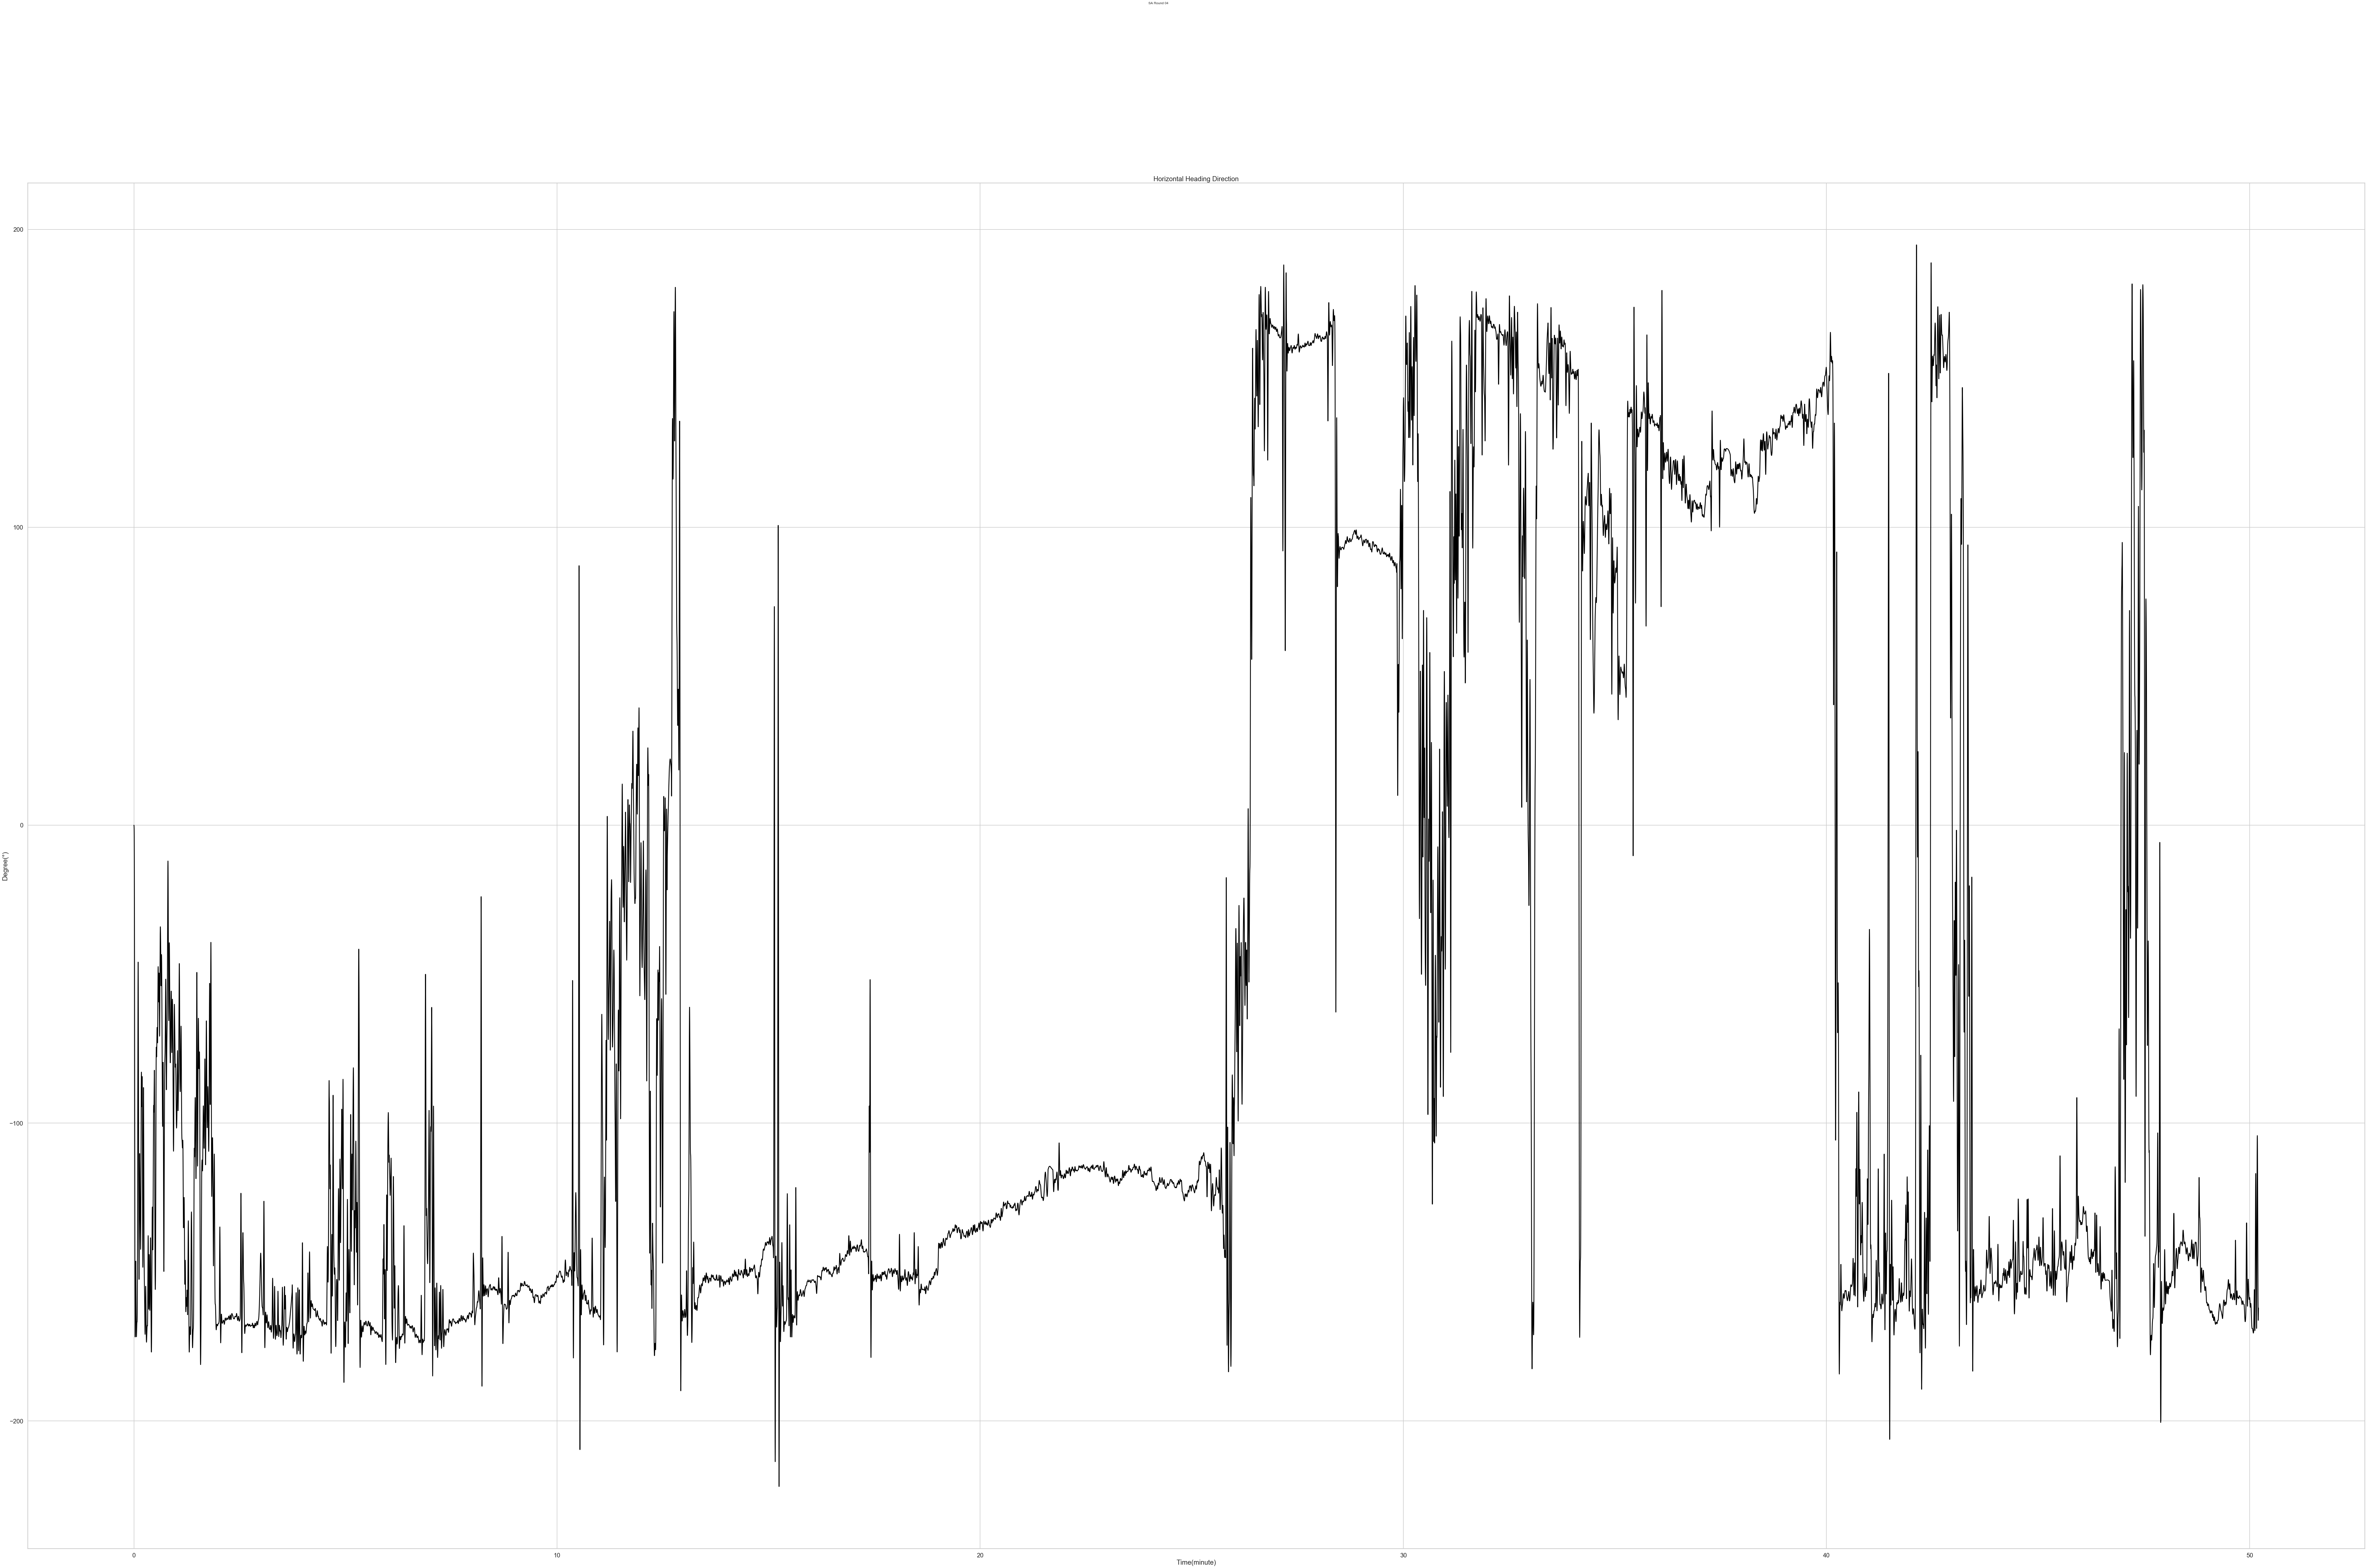

In [10]:
plt.figure(figsize=(150, 90))
test = Trimed_Data01.angles

plt.plot(time_min,test, color = 'black')

plt.xlabel('Time(minute)')
plt.ylabel('Degree(°)')
plt.suptitle('SA Round '+ run_Number)
plt.title('Horizontal Heading Direction')

plt.show()


26.520997424118807


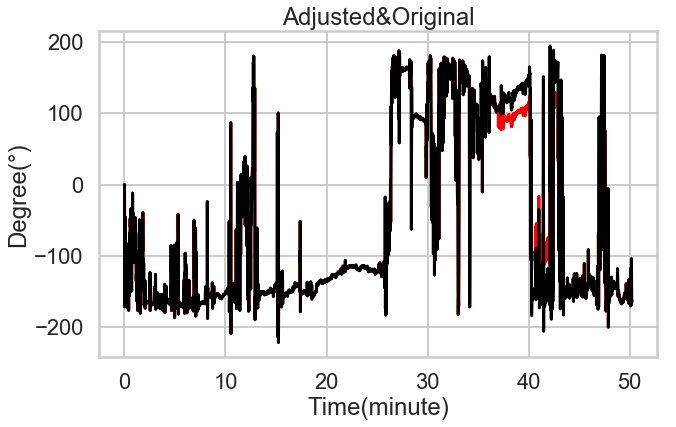

In [11]:
test_angles6 = adjustcurve(test,37*60000,43.2*60000,time,4,0.7)

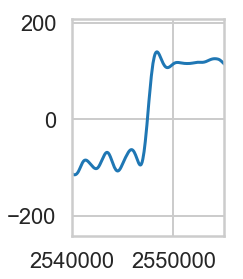

In [12]:
plt.subplot(122)
xlim(2540000, 2555000)
plt.plot(time,test_angles6)

In [13]:
print(time[len(time)-1])

3012561.0


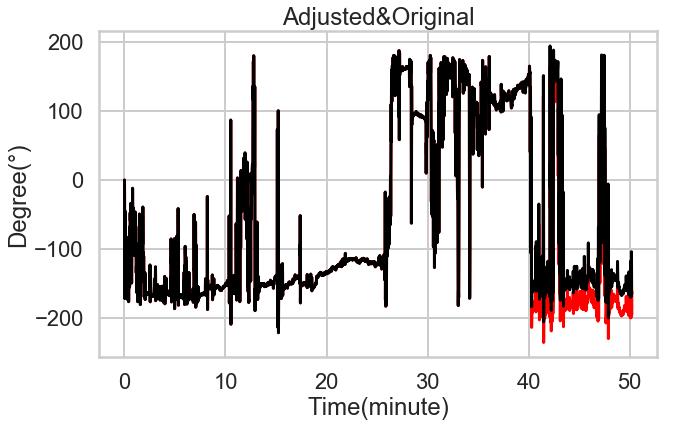

-45.05016136666594


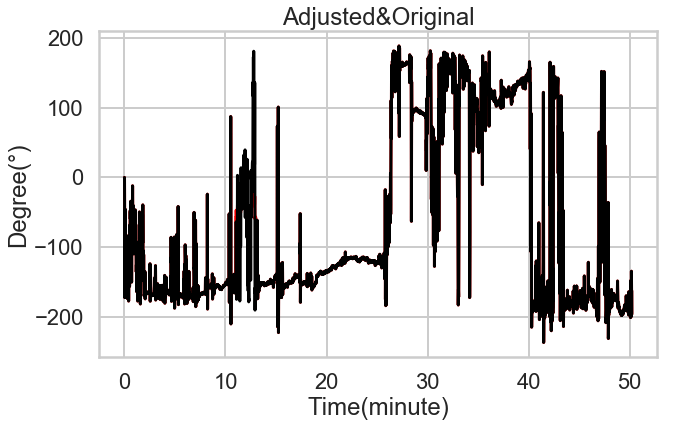

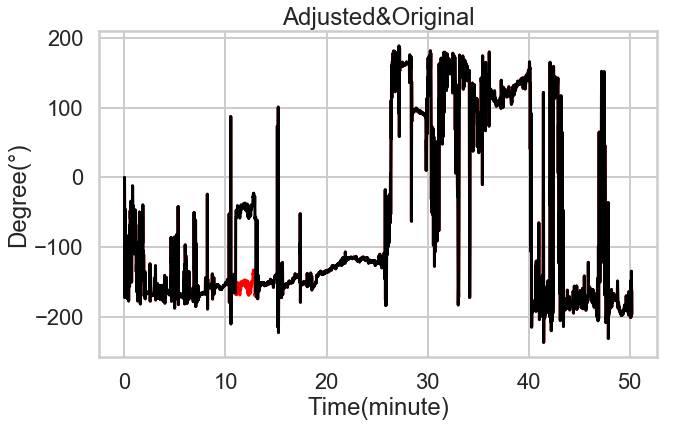

104.46597662860026


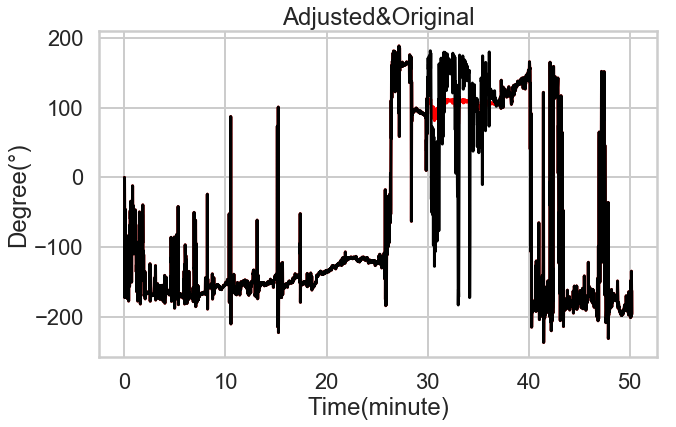

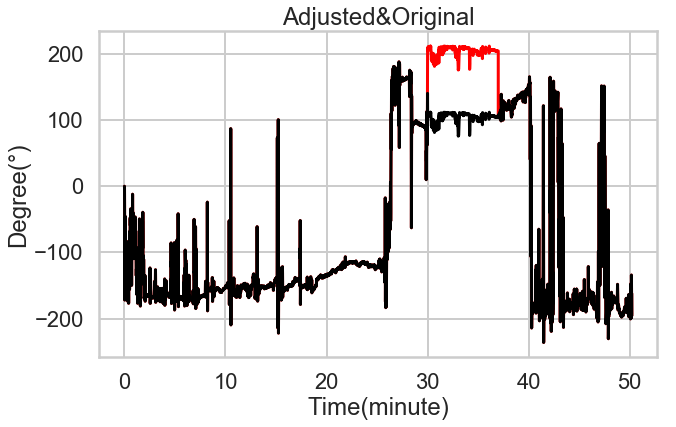

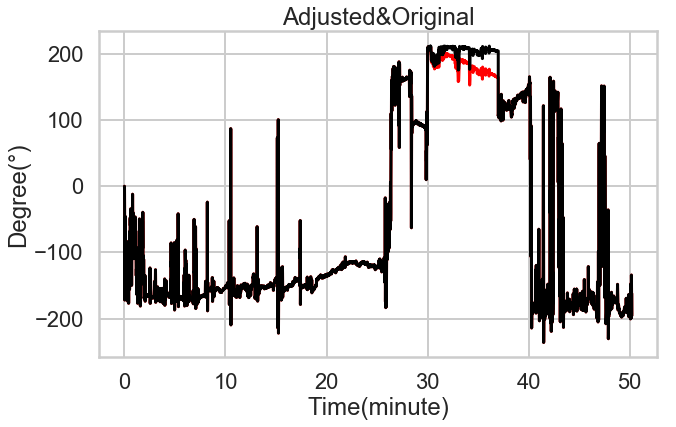

12.03466220330167


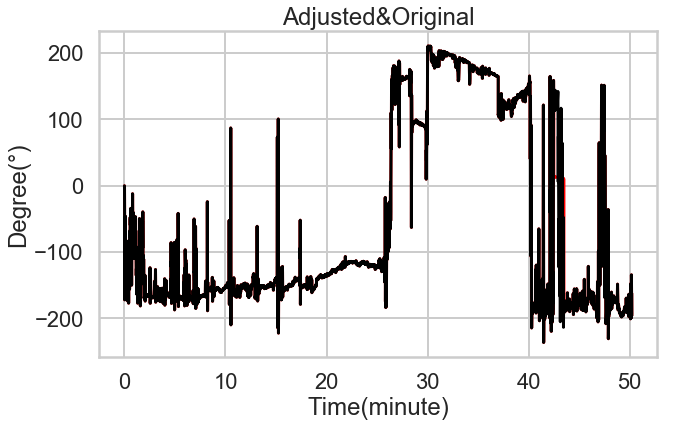

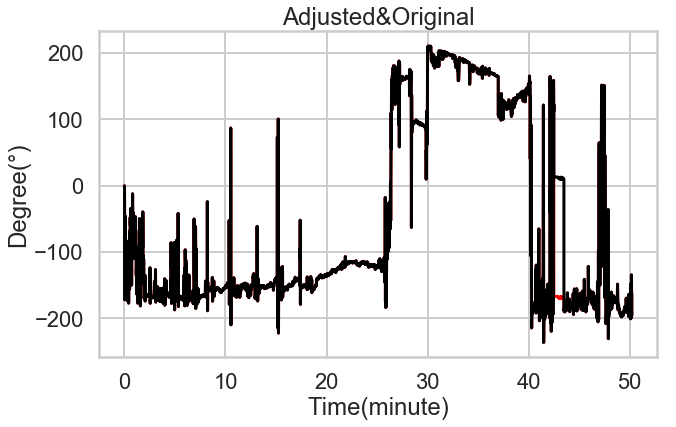

-92.46350369206638


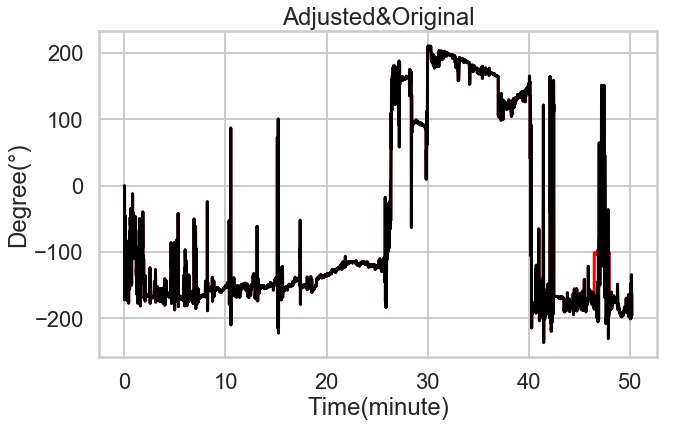

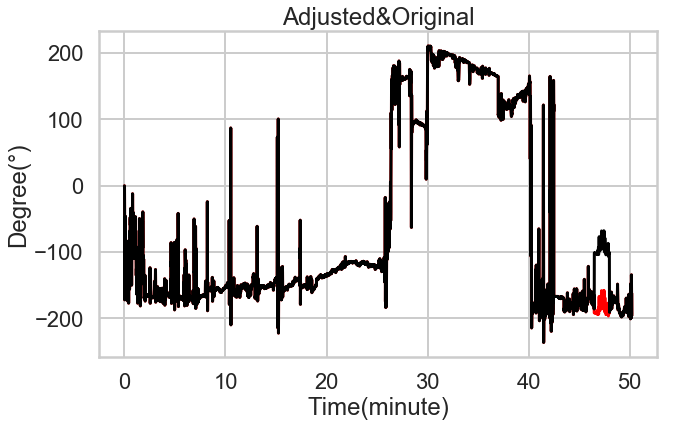

-110.37097953429233


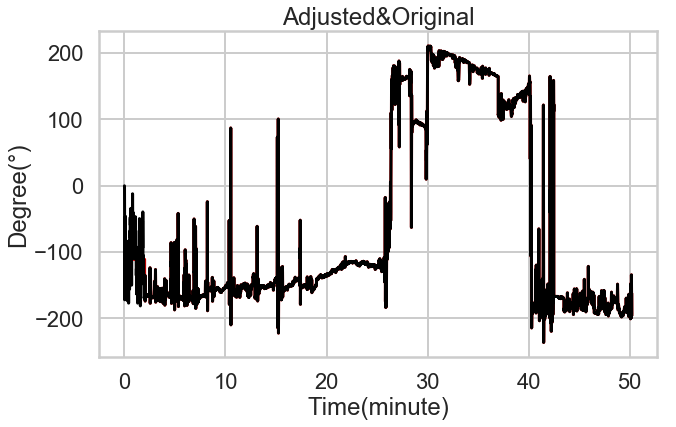

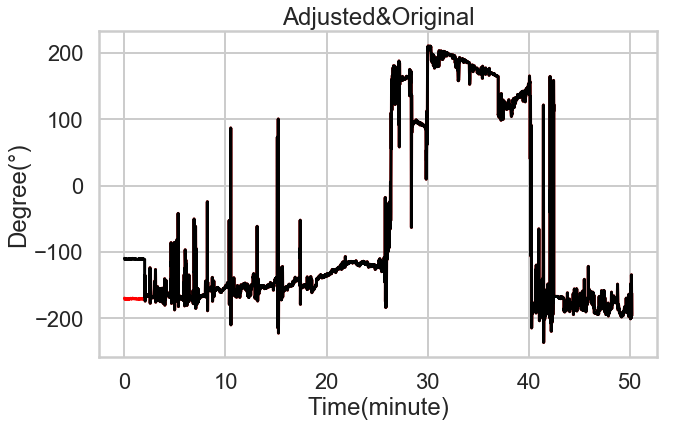

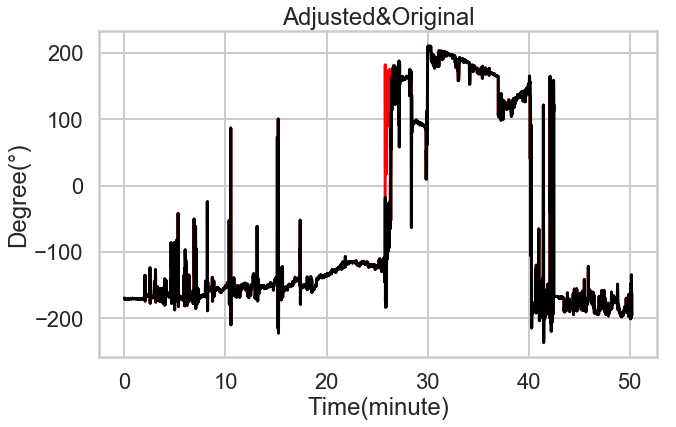

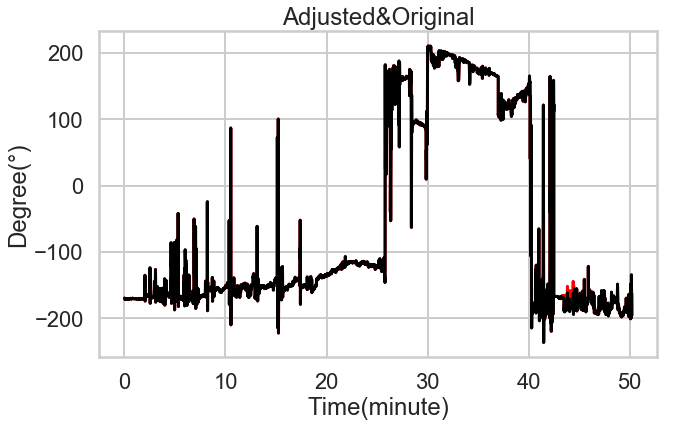

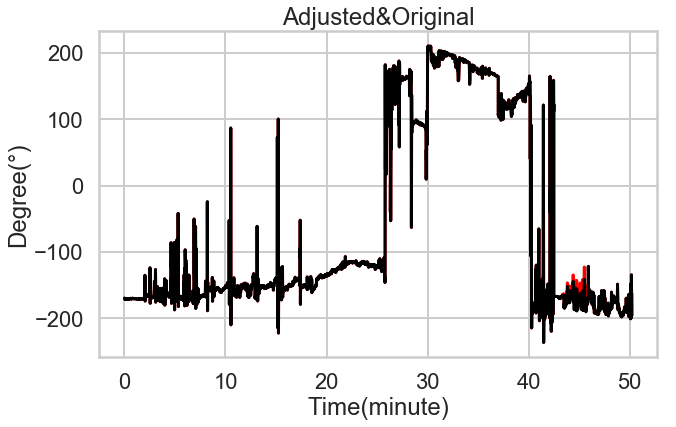

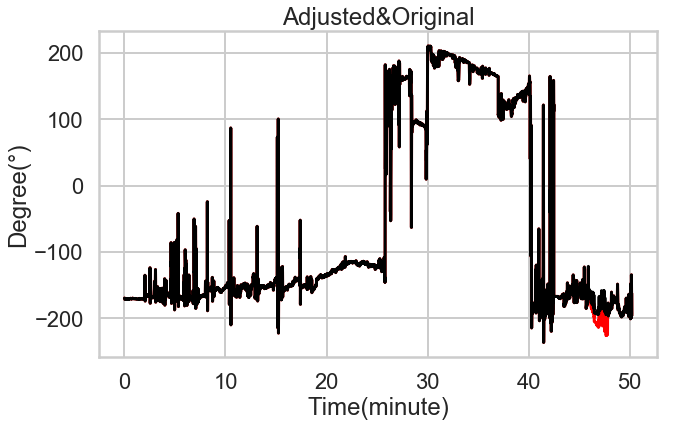

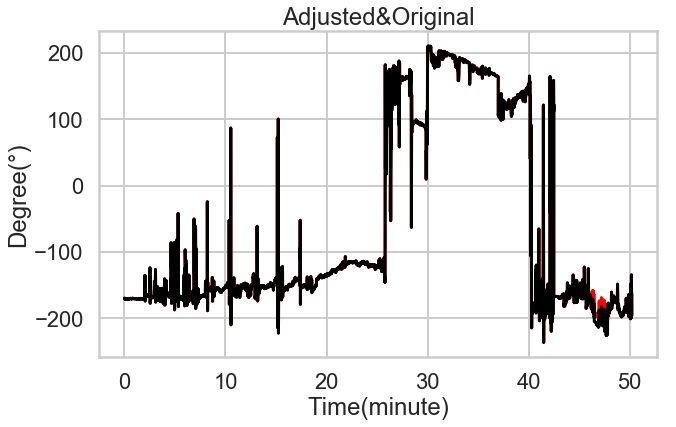

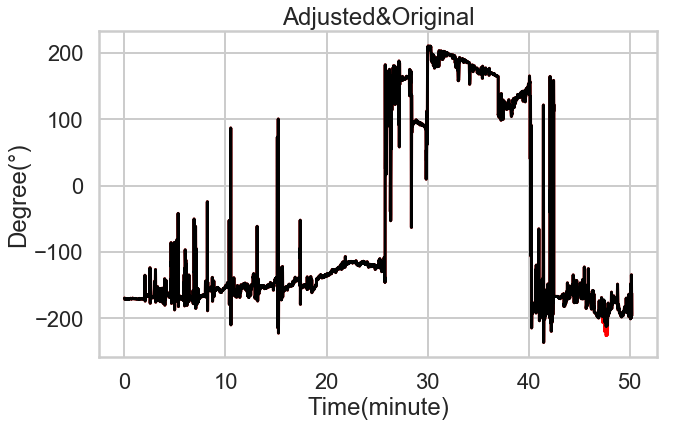

In [14]:
test_angles7 = adjustcurve(test,2418000,3012561,time,1,-30)
test_angles8 = adjustcurve(test_angles7,11*60000,13*60000,time,4,0.1)
test_angles9 = adjustcurve(test_angles8,11*60000,13*60000,time,1,-110)
test_angles10 = adjustcurve(test_angles9,30*60000,37*60000,time,4,0.1)
test_angles11 = adjustcurve(test_angles10,30*60000,37*60000,time,1,100)
test_angles12 = adjustcurve(test_angles11,30*60000,37*60000,time,2,-40)
test_angles13 = adjustcurve(test_angles12,42.5*60000,43.5*60000,time,4,0.01)
test_angles14 = adjustcurve(test_angles13,42.5*60000,43.5*60000,time,1,-180)
test_angles15 = adjustcurve(test_angles14,46.5*60000,48*60000,time,4,0.1)
test_angles16 = adjustcurve(test_angles15,46.5*60000,48*60000,time,1,-90)
test_angles17 = adjustcurve(test_angles16,0*60000,2*60000,time,4,0.01)
test_angles18 = adjustcurve(test_angles17,0*60000,2*60000,time,1,-60)
test_angles19 = adjustcurve(test_angles18,25.8*60000,26.32*60000,time,1,200)
test_angles20 = adjustcurve(test_angles19,time[67053],time[69082],time,2,20)
test_angles21 = adjustcurve(test_angles20,time[67053],time[70912],time,2,20)
test_angles22 = adjustcurve(test_angles21,time[70912],time[74042],time,2,-34)
test_angles23 = adjustcurve(test_angles22,time[71912],time[74042],time,1,14)
test_angles24 = adjustcurve(test_angles23,time[73300],time[74042],time,1,-14)

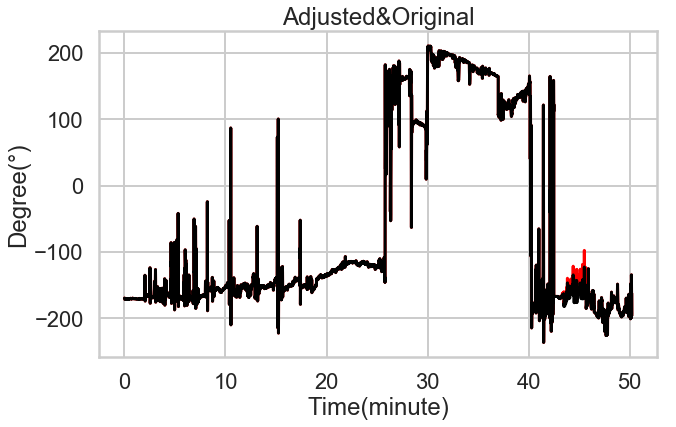

In [15]:
test_angles_final = adjustcurve(test_angles24,time[67053],time[70912],time,2,27)

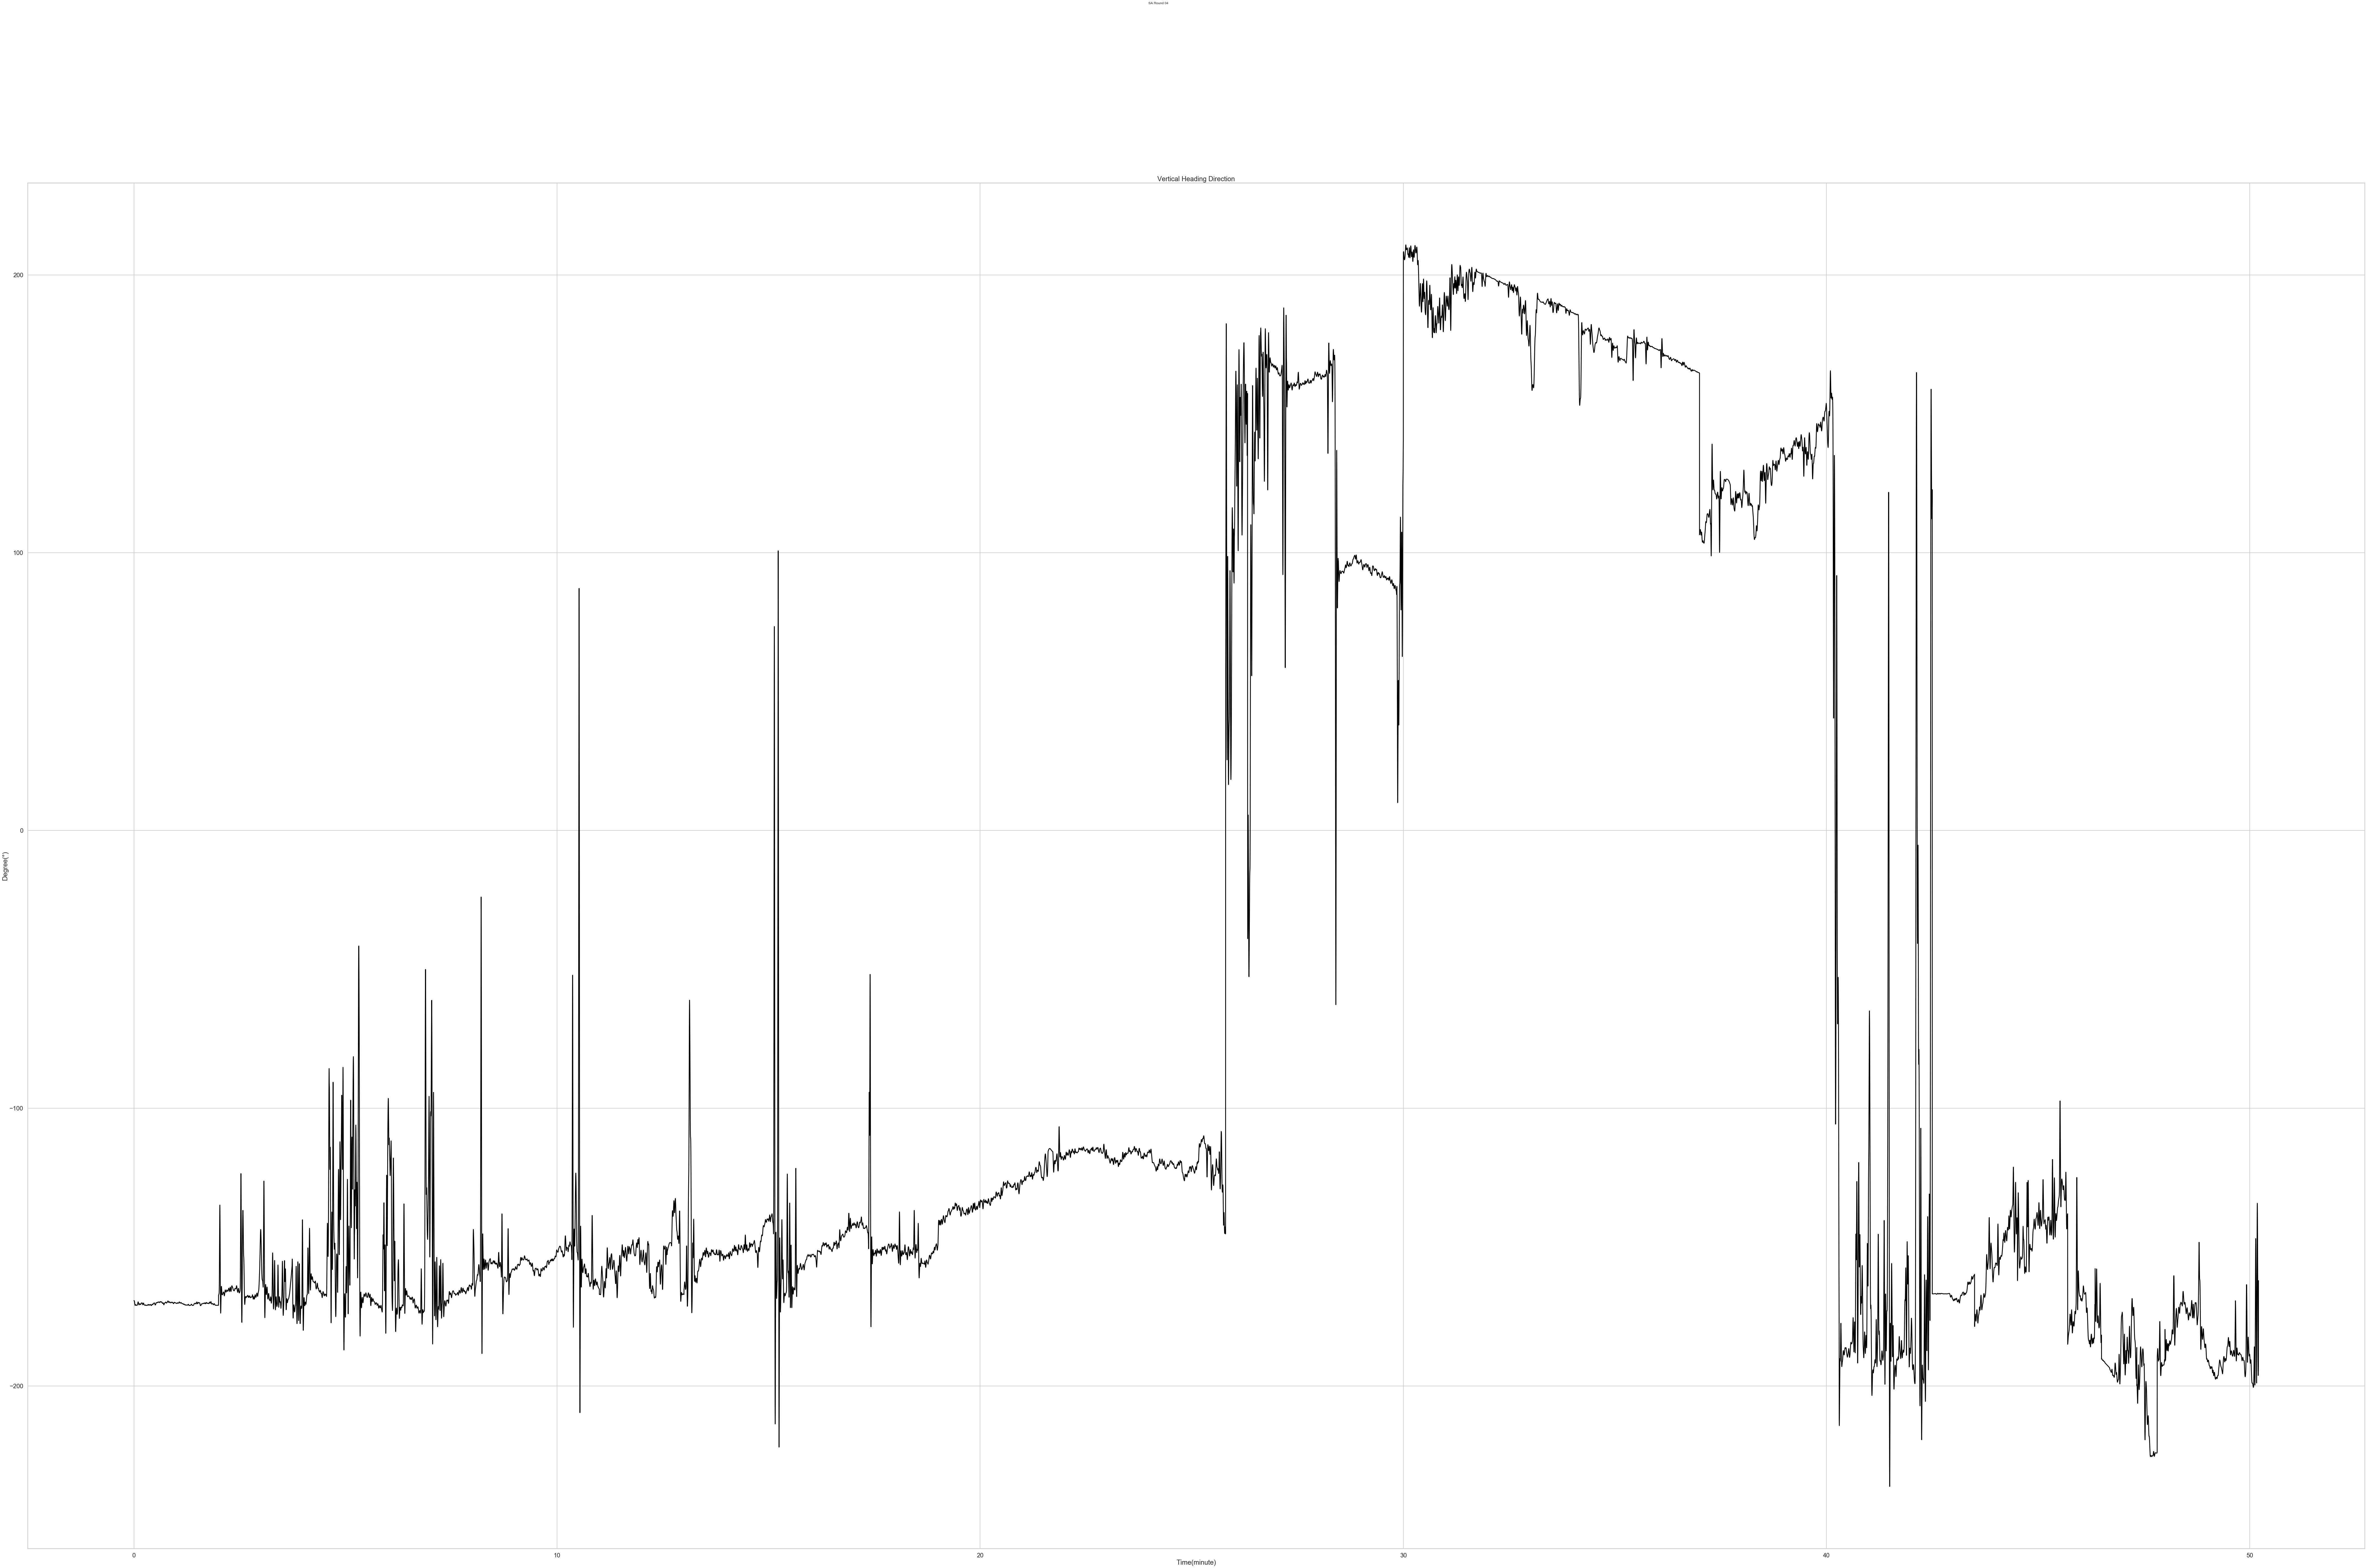

In [16]:
plt.figure(figsize=(150, 90))

plt.plot(time_min,test_angles_final, color ='black')
plt.xlabel('Time(minute)')
plt.ylabel('Degree(°)')
plt.suptitle('SA Round ' + run_Number)
plt.title('Vertical Heading Direction')
plt.show()


In [17]:
Trimed_Data02 = pd.read_csv("Wise_run04with speedAngle.csv",delimiter=",")

Trimed_Data02.head()

Speed0 = Trimed_Data02['velocity']
Speed1 = []
for i in range(len(Speed0)):
    Speed1.append(Speed0[i]/1000)


0.0
728990.0
1800055.0
2220038.0
2592039.0
2742042.0
3012561.0


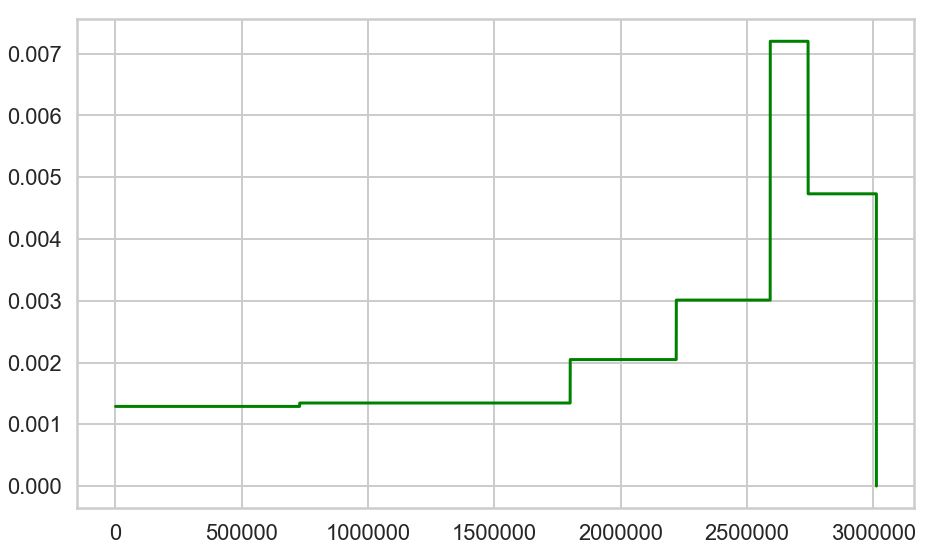

In [18]:
robot_stage = [0,19229,46837,57637,67053,70912,77728]
Speed2 = []
length = [940,1440,860,1120,1080,1280]
for i in range(len(robot_stage)-1):
    for j in range(robot_stage[i],robot_stage[i+1]):
        Speed2.append(length[i]/(time[robot_stage[i+1]]-time[robot_stage[i]]))

Speed2.append(0)
plt.figure(figsize=(15, 9))
plt.plot(time,Speed2, color = 'green')
print(time[0])
print(time[19229])
print(time[46838])
print(time[57638])
print(time[67054])
print(time[70913])
print(time[77728])

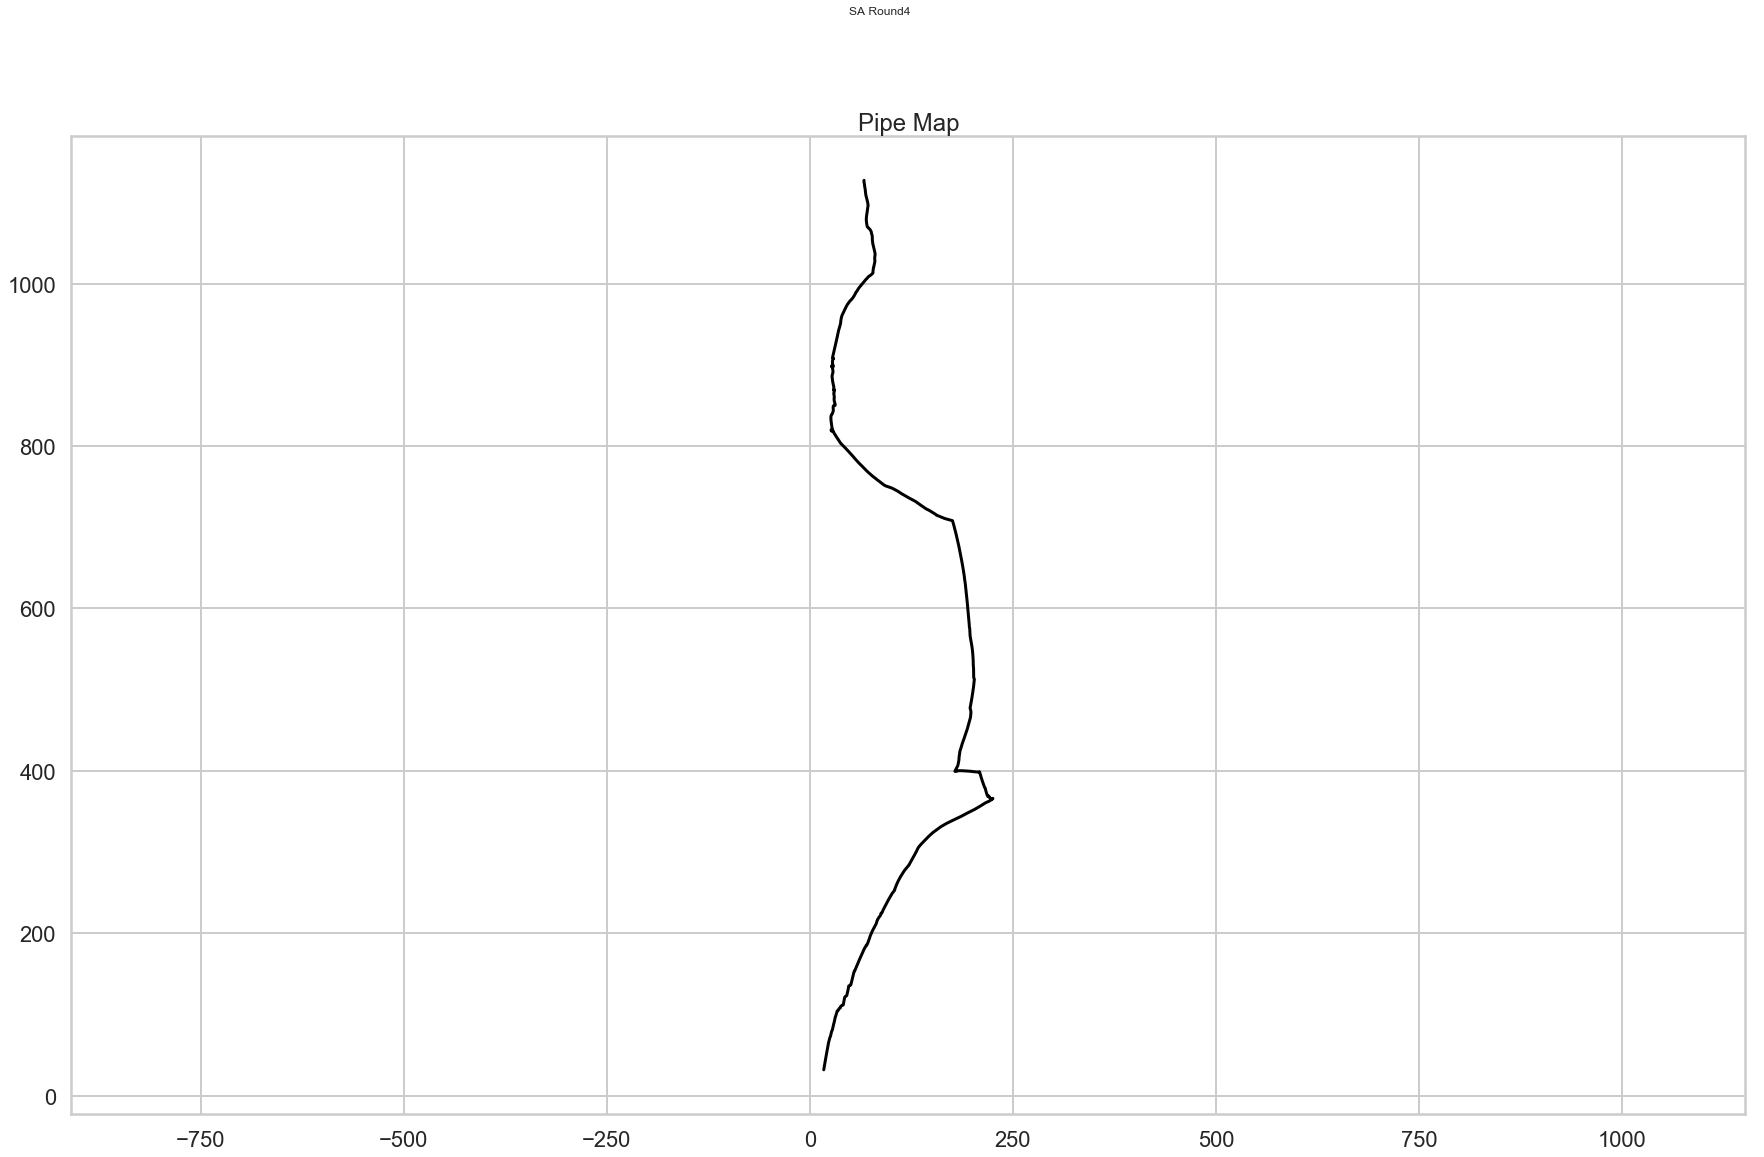

In [19]:
import math
#Draw Map
Speed=[]
Angles=[]
Angles_Adjusted=[]
Point_x = []
Point_y = []
t = []
time = Trimed_Data01['time']

def searchByTime(arr,target):
    left = 0
    right = len(arr) -1
    while(left<right-1):
        mid = int(left + (right-left)/2)
        if arr[mid] > target:
            right = mid
        else:
            left = mid
    if (arr[right] - target) > (target - arr[left]):
        return left
    else:
        return right




initData(Speed1,test_angles_final,Point_x,Point_y,time,7,13,1040/421.8)
# searchByTime(time,6.2812*60000)
# searchByTime(time,8.837*60000)
# searchByTime(time,9.468*60000)

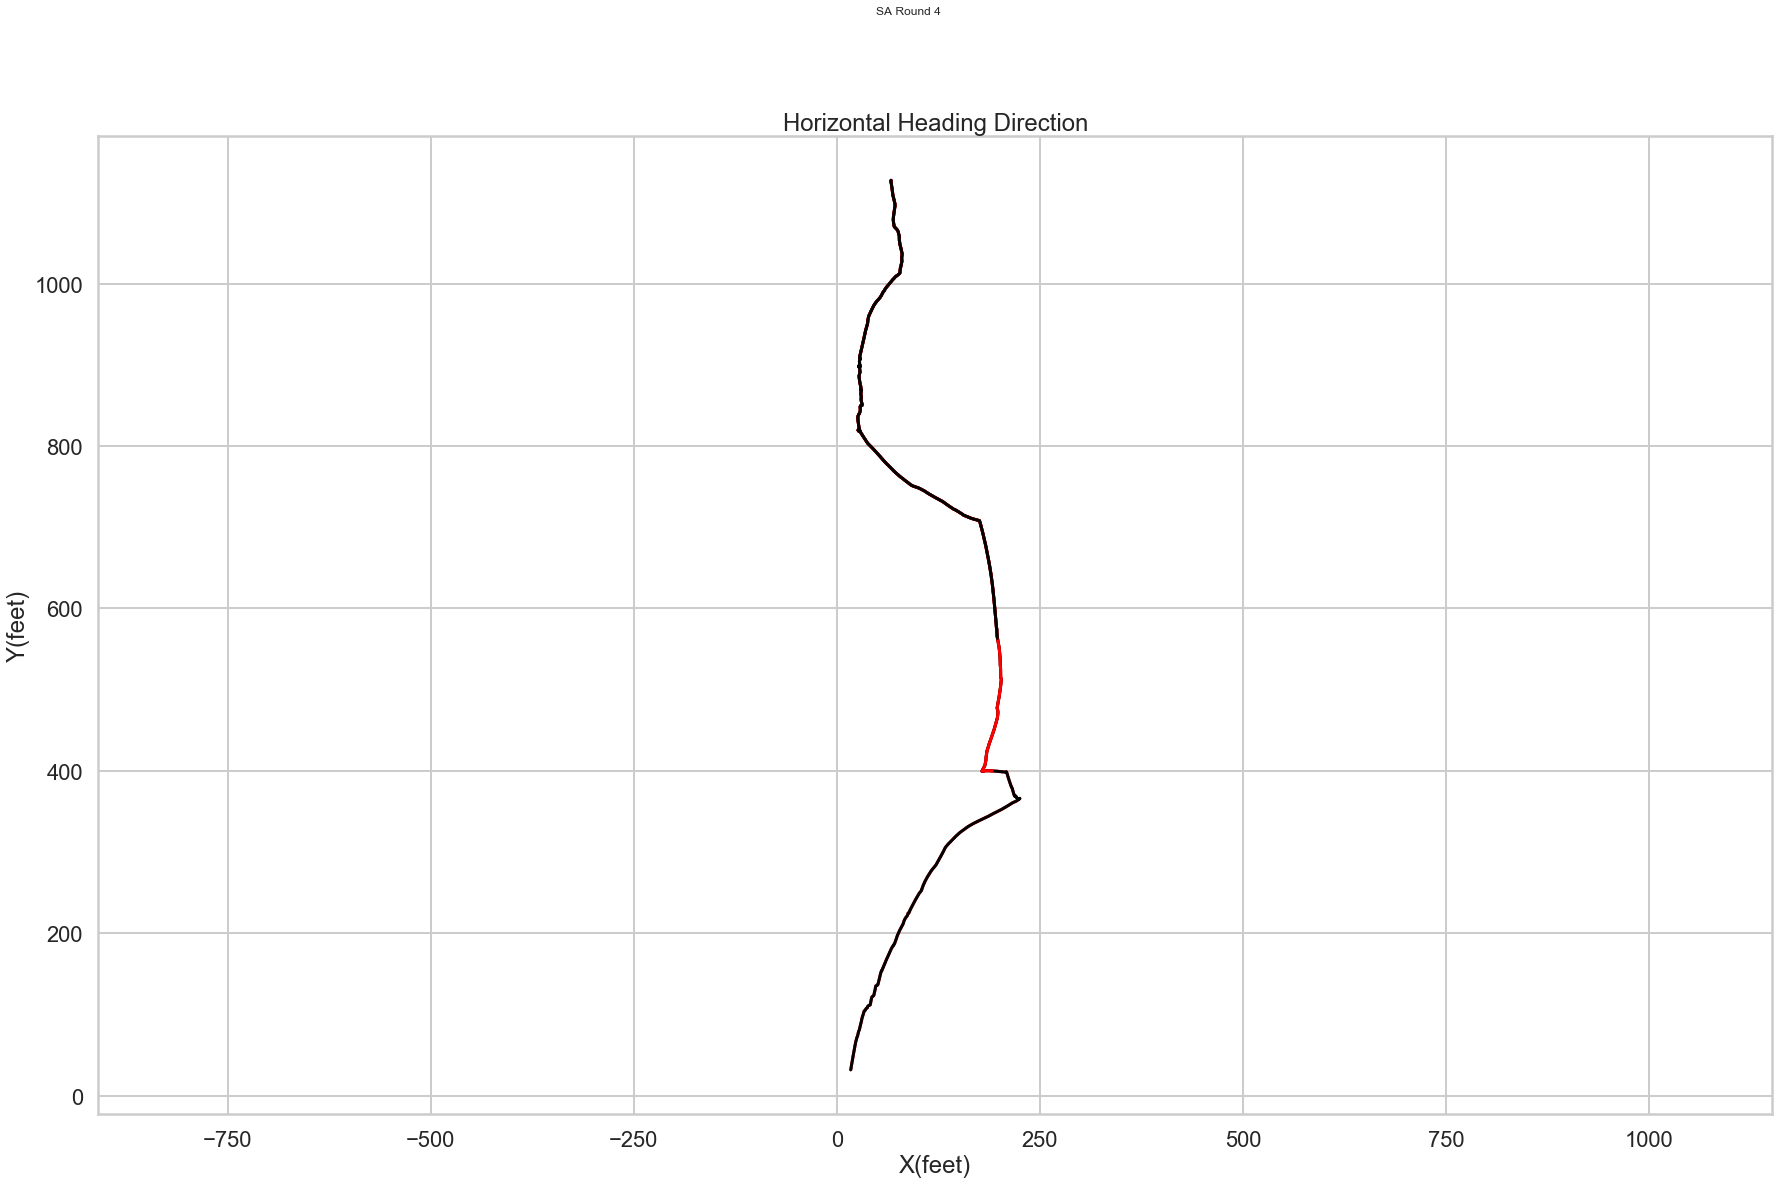

77729


In [20]:
stage = [0,45837,searchByTime(time,49.81*60000-873005),len(time)-1]
DrawMapByColors(stage,Point_x,Point_y,'4')
print(len(time))

In [21]:
searchByTime(time,30*60000)




46837

In [22]:
Sup_Data = pd.read_csv("Wise_Run4_Sup_Data.csv",delimiter=",")
Sup_Data

Index  X_Position  Y_Position Type  Time_Point
0      0      7.0000      13.000    V           0
1      1     21.0000     129.000    V       19229
2      2     34.0000     166.000    V       30403
3      3     78.0000     271.000    V       46837
4      4     50.3750     337.625    V       54615
5      5     42.5000     330.000    V       54952
6      6     -5.0000     373.000    V       57637
7      7    -52.5875     483.000    V       67053
8      8    -17.0000     604.000    V       70912
9      9     16.0000     782.000    V       77728

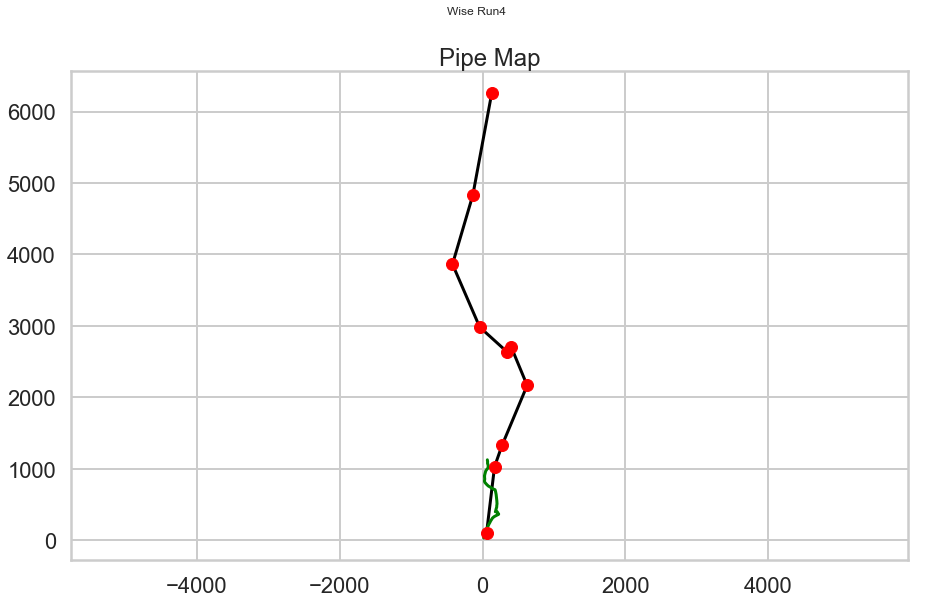

[55.99552163780103, 167.9865649134031, 271.97824795503357, 623.9500982497829, 402.9677717863181, 339.97280994379196, -39.996801169857875, -420.66635630398025, -135.98912397751678, 127.98976374354521] [103.99168304163048, 1031.9174701823333, 1327.8937988392815, 2167.826623406297, 2700.7839989946533, 2639.78887721062, 2983.761367271398, 3863.690993008271, 4831.613581318832, 6255.4997029657725]


In [23]:
Stage = Sup_Data['Index']
X_Position = Sup_Data['X_Position']
Y_Position = Sup_Data['Y_Position']
Type = Sup_Data['Type']
Time_Point = Sup_Data['Time_Point']
x_1 = []
y_1 = []
color1 = []
for i in range(len(Stage)):
    x_1.append(X_Position[i]*(1750.5/218.83))
    y_1.append(Y_Position[i]*(1750.5/218.83))
    if Type[i] == 'V':
        color1.append('red')
    elif Type[i] == 'B':
        color1.append('green')
    else:
        color1.append('blue')

plt.figure(figsize=(15, 9))
plt.axis('equal') 
plt.plot(x_1,y_1, color = 'black')
plt.plot(Point_x,Point_y,color = 'green')

for i in range(len(color1)):
    plt.plot(x_1[i], y_1[i], 'o', color = color1[i], label='run1_valve')
plt.suptitle('Wise Run4')


plt.title('Pipe Map')
plt.show() 
print(x_1,y_1)

In [24]:
searchByTime(time,18*60000)

28403

10
934.6594354173346
190.12656313760712
313.7136548941993
112.56708973980942
910.6982668178491
99.75884968011498
576.9547233563769
152.4717834988966
87.68563222666756
12.600958436614532
512.5368077401566
146.59156132124107
958.7416004614822
269.90766816797486
1008.9178676021507
86.5463916083074
1448.1493502333296
114.6539992783049
[4.915985541383084, 2.786903842138279, 9.12899727430778, 3.784009802446839, 6.958647841570522, 3.496359566134795, 3.5521095305258874, 11.657538215669605, 12.630604770429077]
[1.182608789335402, 1.1639753865150042, 1.034995913896812, 1.37316248361694, -1.35796340323375, 1.3977480678293888, 0.9327132228704895, 1.2274348300751747, 0.8324860214971405]
[12.835390704325519, 9.952306222638974, 2.2745388133565996, 30.580173247767107, -236.03547235772913, 39.22900379586264, -8.180946120634644, 13.640551882633751, -15.997673039248625]
77728


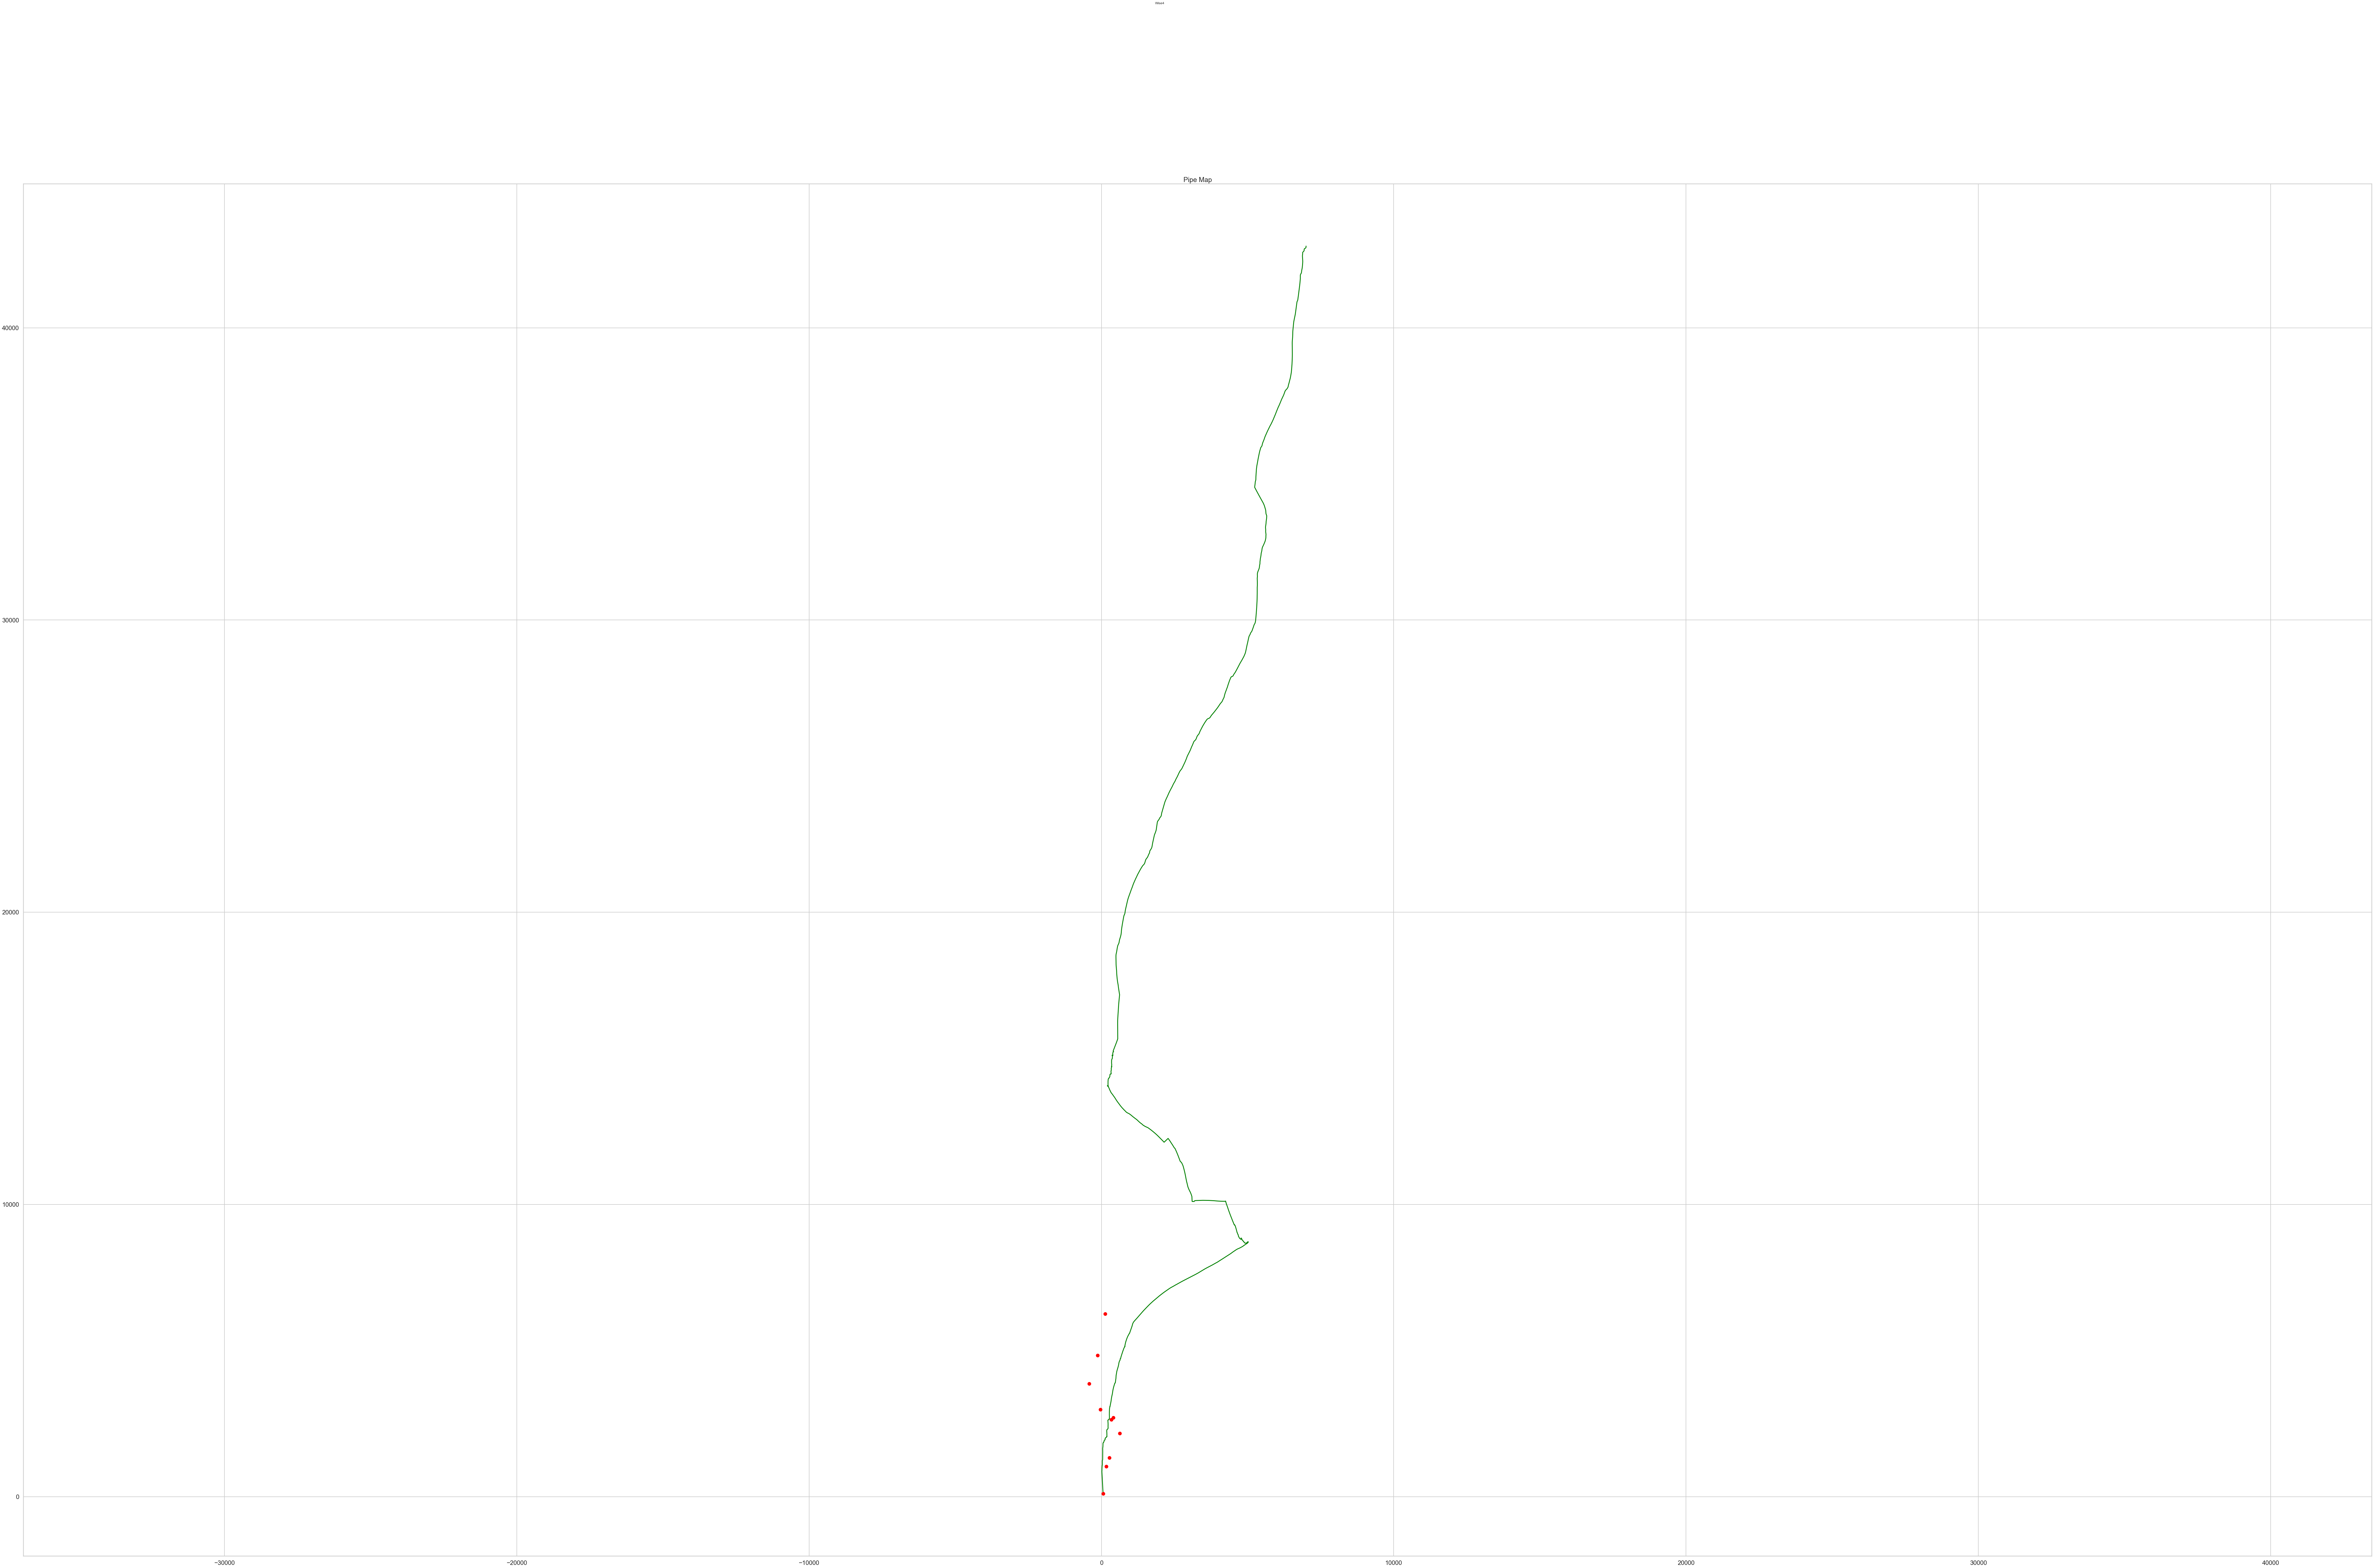

In [25]:
Speed_Adjusted = []
Angles_Adjusted = []

#k1: coefficent of angle (change every point's angle equally)
#k2: coefficent of length(change speed)
coe_length = []
coe_angle = []
coe_angle_d = []
robot_stage = [0,19229,30403,46837,54615,54952,57637,67053,70912,77728]
sup_x = []
sup_y = []
x_adjusted = []
y_adjusted = []


for i in range(len(Stage)):
    if Time_Point[i] != Time_Point[i]:
        continue
    else:
        if IsExist(robot_stage,Time_Point[i]):
            sup_x.append(x_1[i])
            sup_y.append(y_1[i])
            
print(len(sup_x))#Standard
# print(len(Point_x))

        
        
for i in range(1, len(sup_x)):
    
    standard_len = math.sqrt((sup_x[i]-sup_x[i-1])*(sup_x[i]-sup_x[i-1])+(sup_y[i]-sup_y[i-1])*(sup_y[i]-sup_y[i-1]))
    robot_len = math.sqrt((Point_x[robot_stage[i]-1]-Point_x[robot_stage[i-1]])*(Point_x[robot_stage[i]-1]
        -Point_x[robot_stage[i-1]])+(Point_y[robot_stage[i]-1]-Point_y[robot_stage[i-1]])*
                          (Point_y[robot_stage[i]-1]-Point_y[robot_stage[i-1]]))
    print(standard_len)
    print(robot_len)
    k_length = standard_len/robot_len
    standard_angle = math.atan2((sup_y[i]-sup_y[i-1]),(sup_x[i]-sup_x[i-1]))*57.3
    
    robot_angle = math.atan2((Point_y[robot_stage[i]-1]-Point_y[robot_stage[i-1]]),
                             (Point_x[robot_stage[i]-1]-Point_x[robot_stage[i-1]]))*57.3
    k_angle = standard_angle/robot_angle
    d_angle = standard_angle -robot_angle  
    coe_length.append(k_length)
    coe_angle.append(k_angle)
    coe_angle_d.append(d_angle)
    
print(coe_length) 
print(coe_angle)
print(coe_angle_d)


for i in range(len(sup_x)-1):
    for j in range(robot_stage[i],robot_stage[i+1]):
        Speed_Adjusted.append(Speed2[j]*coe_length[i])
        Angles_Adjusted.append(test_angles_final[j]-coe_angle_d[i])
print(len(Angles_Adjusted))
for i in range(len(Angles_Adjusted)):
    if i == 0:
        x_adjusted.append(7*1750.5/218.83)
        y_adjusted.append(13*1750.5/218.83)
    else:
        x_point = x_adjusted[i-1]-Speed_Adjusted[i-1]*(time[i]-time[i-1])*math.sin(Angles_Adjusted[i-1]/57.3)
        y_point = y_adjusted[i-1]-Speed_Adjusted[i-1]*(time[i]-time[i-1])*math.cos(Angles_Adjusted[i-1]/57.3)
        x_adjusted.append(x_point)
        y_adjusted.append(y_point)

            
plt.figure(figsize=(150, 90))
plt.axis('equal') 
plt.plot(x_adjusted,y_adjusted, color = 'green')
for i in range(len(color1)):
    plt.plot(x_1[i], y_1[i], 'o', color = color1[i], label='run1_valve')
plt.suptitle('Wise4')
    
plt.title('Pipe Map')


plt.show() 

In [26]:
Iron = [17.52763,22.73937,23.22815,23.26125,24.90232,25.0545,29.66638,29.75922,31.91015,31.9339,39.89335,40.29265,40.34357,
       41.6812,41.7353,42.05255,45.6481,46.40177,46.45315,48.67967,48.9138,48.95187,49.45957,49.4944,49.59672,49.65038,
       49.81387,49.96017,50.01617,50.26365,50.2782,50.30112,50.62053,50.65975,50.76115,50.84045,52.5798,55.19668,55.22368,
       55.49783,55.75612,55.77717,55.95042,56.40653,56.98588,57.95967,57.96965,59.06232,63.32845,63.3393,63.3576,63.8062,
       64.45945,64.47687]
Copper = [19.49645,24.71723,27.30352,27.9181,36.20558,44.64735,47.13798,53.99867,54.70538,54.84797,56.64127,56.64855,
         59.53205,62.36585]
POI = [8.8,15.31,17.37,25.58,28.37,29.81,34.12,34.35,37.25,37.44,40.62,42.08,43,43.46,43.75,44.5,44.96,47.48,47.74,48.8]
POI_advance = [10.82,31.23,33.11,40.31,44.28,45.5,]


Iron_Index = []
Copper_Index = []
POI_Index = []
POI_advance_Index = []


for i in range(len(Iron)):
    Iron_Index.append(searchByTime(time,(Iron[i]-873005/60000)*60000))
for i in range(len(Copper)):
    Copper_Index.append(searchByTime(time,(Copper[i]-873005/60000)*60000))
for i in range(len(POI)):
    POI_Index.append(searchByTime(time,POI[i]*60000))
for i in range(len(POI_advance)):
    POI_advance_Index.append(searchByTime(time,POI_advance[i]*60000))

    
print(len(POI))
print(len(POI_advance))
print(Iron_Index)
print(Copper_Index)
print(POI_Index)
print(POI_advance_Index)



20
6
[4758, 12904, 13685, 13738, 16359, 16602, 23798, 23946, 27381, 27419, 39679, 40287, 40366, 42420, 42504, 42991, 48531, 49691, 49770, 53211, 53572, 53630, 54415, 54469, 54626, 54708, 54958, 55183, 55270, 55653, 55675, 55711, 56204, 56265, 56420, 56542, 59095, 63117, 63159, 63581, 63975, 64008, 64277, 64978, 65874, 67376, 67391, 69082, 75518, 75535, 75564, 76256, 77270, 77297]
[7744, 16063, 20057, 21028, 34103, 46988, 50828, 61274, 62360, 62579, 65340, 65351, 69805, 74042]
[13880, 24107, 27397, 40042, 44326, 46546, 53196, 53551, 58022, 58318, 63076, 65323, 66741, 67453, 67900, 69063, 69771, 73528, 73923, 75552]
[17106, 48734, 51637, 62597, 68722, 70605]


In [27]:
print(time[46837])
print(searchByTime(time,49.81*60000-873005))
print(searchByTime(time,49.59*60000-873005))

1800017.0
54952
54615


30.876404100930248 1231.827423906252
285.1815351612618 3078.7939895079094
326.02478254723246 3250.612651283945
329.4905267299871 3262.575417062858
453.0322008456514 3872.773090292728
477.3419548765497 3919.1043467548047
799.6447484329993 5136.723850070539
801.4940615026212 5148.30147791565
955.7775980245708 5591.895924727019
959.4848087062151 5595.172241991586
4755.812109974394 8522.159406461109
5000.628489027723 8682.849373476589
5022.971674906304 8712.893357481069
4575.673305474512 9270.915060261917
4557.972523021541 9300.074508888882
4463.221173428762 9500.627856511785
2963.280513838255 10589.013245336833
2885.860897888401 10929.92144542081
2880.878833517816 10953.276374859097
2518.7061236369714 11912.353607148265
2456.224097158323 11999.54558880428
2447.2809054258146 12014.816695087566
2317.150603060268 12211.555618329701
2307.349548354372 12224.432863272928
2276.2806882363147 12256.131740016766
2242.6667144711573 12224.947493856112
2144.1175259273596 12130.120681635588
2101.172627

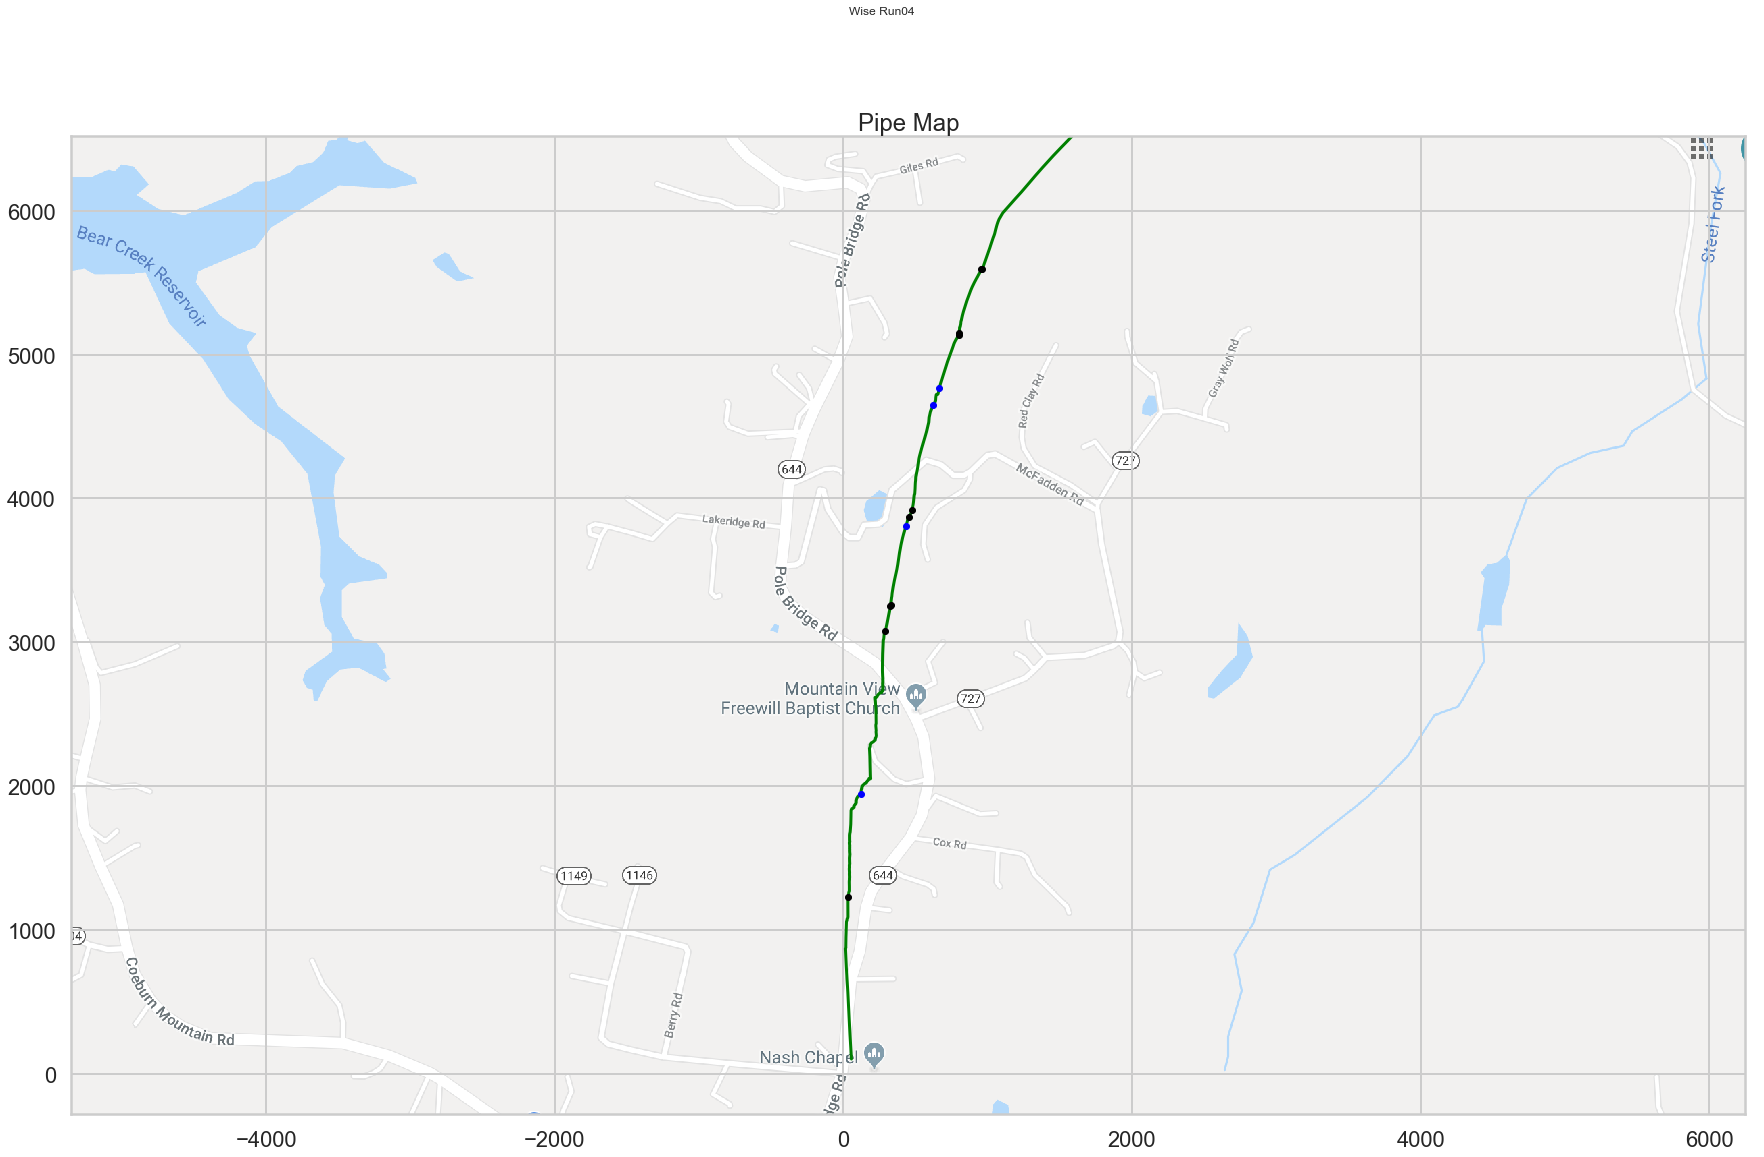

In [28]:
plt.figure(figsize=(30, 18))
plt.axis('equal') 
plt.plot(x_adjusted,y_adjusted, color = 'green')
for i in range(len(Iron_Index)):
    plt.plot(x_adjusted[Iron_Index[i]], y_adjusted[Iron_Index[i]], '.', color = 'black', label='Iron')
    print(x_adjusted[Iron_Index[i]], y_adjusted[Iron_Index[i]])
for i in range(len(Copper_Index)):
    plt.plot(x_adjusted[Copper_Index[i]], y_adjusted[Copper_Index[i]], '.', color = 'blue', label='Copper')
    print(x_adjusted[Copper_Index[i]], y_adjusted[Copper_Index[i]])
plt.suptitle('Wise Run04')
    
plt.title('Pipe Map')
img = plt.imread("run4.png")
# here we need to adjust the 3300,2430,1620 coefficient 
# 1.7059 is the scale coefficient of screenshot
size_x = 11600
size_y = size_x/1.7059
first_x = -5350
second_x  = size_x+first_x
first_y = -280
second_y  = size_y+first_y
plt.imshow(img,zorder=0,extent = [first_x,second_x,first_y,second_y])
# for i in range(len(color1)):
#     if i == 2:
#         continue
#     else:
#         plt.plot(x_1[i], y_1[i], 'o', color = color1[i], label='run1_valve')
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.show() 

In [29]:
POI_X = []
POI_Y = []
POI_advanced_X = []
POI_advanced_Y = []
Iron_X = []
Iron_Y = []
Copper_X = []
Copper_Y = []




for i in range(len(POI_Index)):
    POI_X.append(x_adjusted[POI_Index[i]])
    POI_Y.append(y_adjusted[POI_Index[i]])
for i in range(len(POI_advance_Index)-1):
    POI_advanced_X.append(x_adjusted[POI_advance_Index[i]])
    POI_advanced_Y.append(y_adjusted[POI_advance_Index[i]])
for i in range(len(Iron_Index)):
    Iron_X.append(x_adjusted[Iron_Index[i]])
    Iron_Y.append(y_adjusted[Iron_Index[i]])
for i in range(len(Copper_Index)):
    Copper_X.append(x_adjusted[Copper_Index[i]])
    Copper_Y.append(y_adjusted[Copper_Index[i]])
                        
    
    

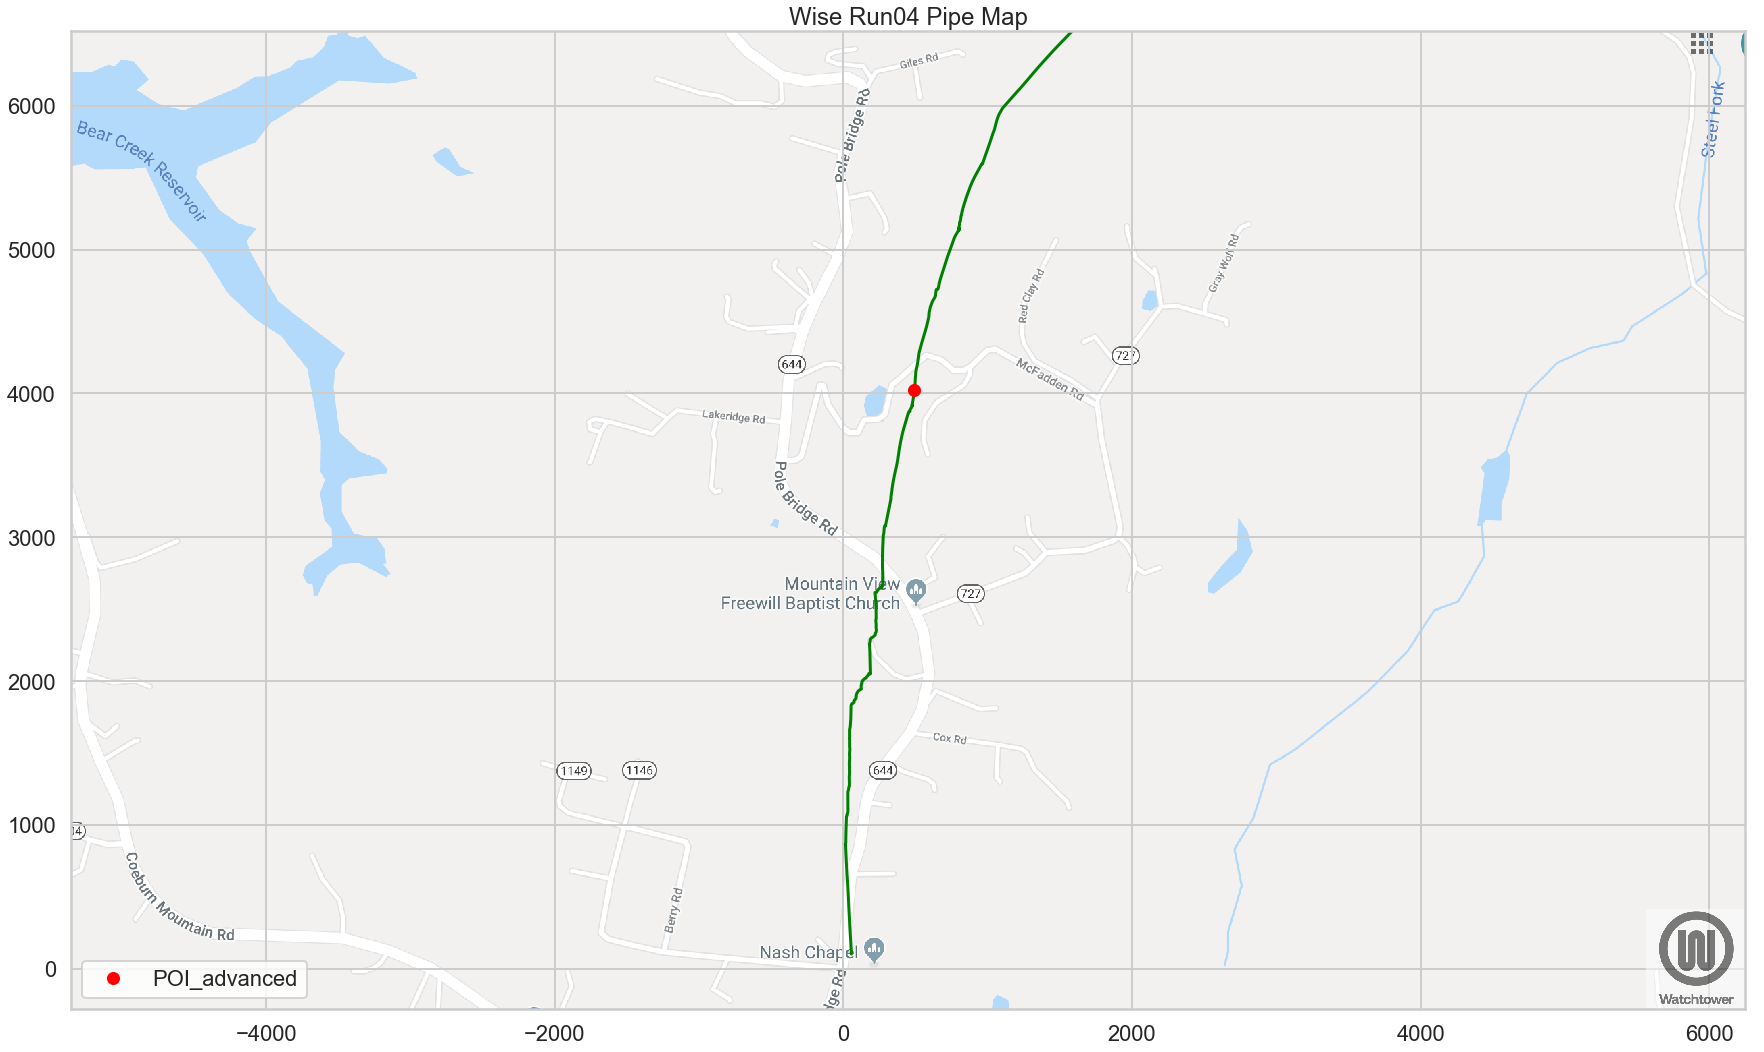

In [30]:
plt.figure(figsize=(30, 18))
plt.axis('equal') 
plt.plot(x_adjusted,y_adjusted, color = 'green')

# plt.plot(POI_X,POI_Y,'o', color = 'orange', label='POI')
plt.plot(POI_advanced_X,POI_advanced_Y,'o', color = 'red', label='POI_advanced')
# plt.plot(Iron_X,Iron_Y, '.', color = 'black', label='Iron')
# plt.plot(Copper_X,Copper_Y, '.', color = 'blue', label='Copper')

plt.legend(loc='lower left')
plt.title('Wise Run04 Pipe Map')
img = plt.imread("run4.png")
# here we need to adjust the 3300,2430,1620 coefficient 
# 1.7059 is the scale coefficient of screenshot
size_x = 11600
size_y = size_x/1.7059
first_x = -5350
second_x  = size_x+first_x
first_y = -280
second_y  = size_y+first_y
img2 = plt.imread("test5.png")
plt.imshow(img2,zorder = 1,extent = [xmax-250*(11600/4200),xmax,ymin,ymin+250*(11600/4200)], alpha = 0.5)
plt.imshow(img,zorder=0,extent = [first_x,second_x,first_y,second_y])
plt.show() 



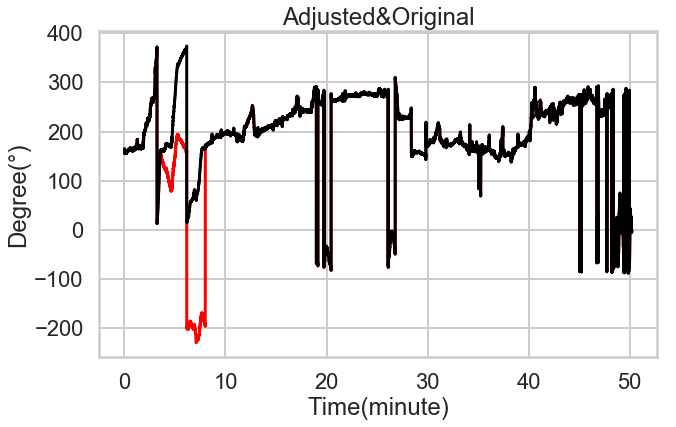

In [31]:
test_angles = adjustcurve(Test_Horizontal,3.5*60000,8*60000,time,2,-360)

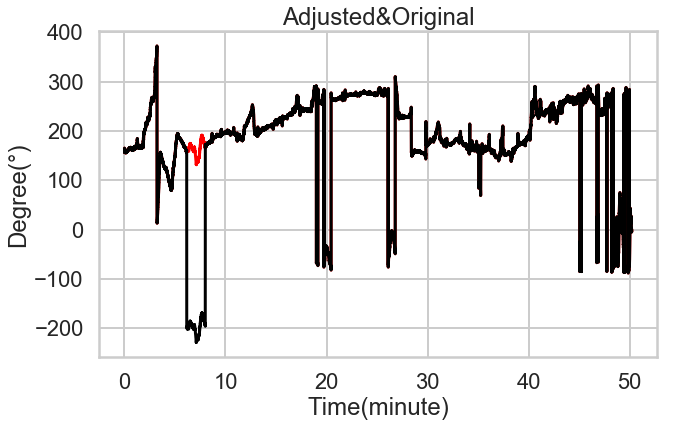

In [32]:
test_angles1 = adjustcurve(test_angles,6.1629*60000,8*60000,time,1,360)

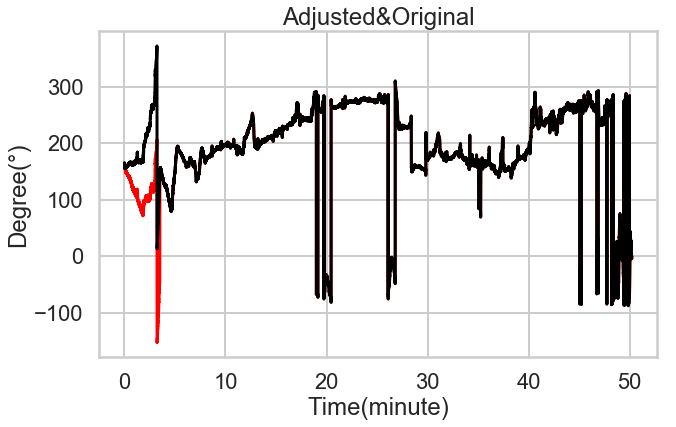

In [33]:
test_angles2 = adjustcurve(test_angles1,0,3.5*60000,time,2,-180)

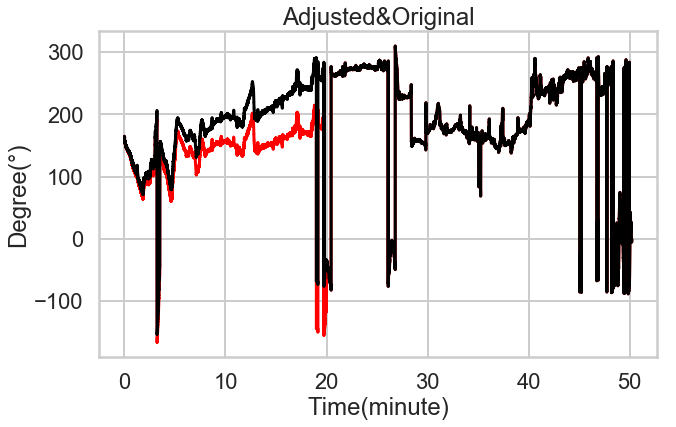

In [34]:
test_angles3 = adjustcurve(test_angles2,0,20*60000,time,2,-80)

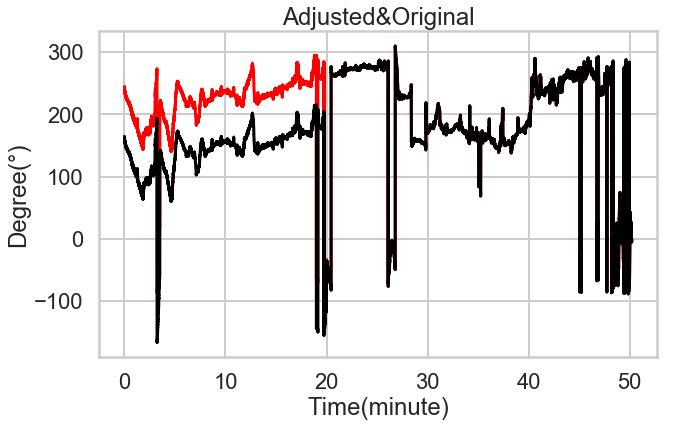

In [35]:
test_angles4 = adjustcurve(test_angles3,0,20*60000,time,1,80)

217.8905066977286


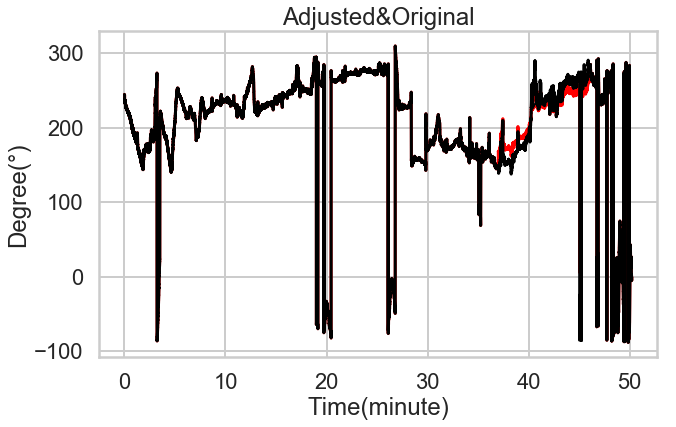

In [36]:
test_angles5 = adjustcurve(test_angles4,37*60000,46*60000,time,4,0.7)

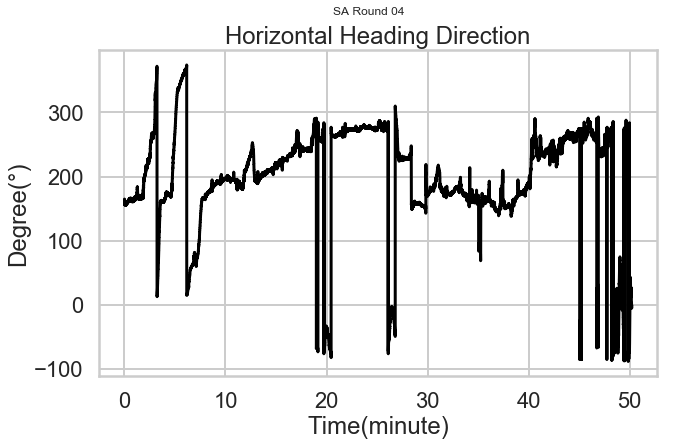

In [37]:
plt.figure(figsize=(10, 6))

plt.plot(time_min,Test_Horizontal, color = 'black')

plt.xlabel('Time(minute)')
plt.ylabel('Degree(°)')
plt.suptitle('SA Round '+ run_Number)
plt.title('Horizontal Heading Direction')

plt.show()

In [ ]:
test_angles7 = adjustcurve(test,2418000,3012561,time,1,-30)
def BendAdjustment(time, begin_time, end_time, angles, mode, num):